<h1 style="color:brown;"> TELECOM CHURN CASE STUDY

<h3><b>PROBLEM STATEMENT:</h3></b>

Telecom companies often face challenges in retaining high-value customers, especially when faced with the risk of churn. Understanding customer behavior during churn is crucial for developing effective retention strategies. In this scenario, the objective is to predict churn among high-value customers and identify key predictors of churn using data from the preceding months.

<h3><b>DATA SCENARIO CATEGORIZATION:</h3></b>

This scenario falls under predictive analytics and customer churn analysis within the telecommunications industry.

<h3><b>OBJECTIVES:</h3></b>
<p>
    
<ol><li>Filter high-value customers: Identify high-value customers based on their recharge amounts in the first two months, ensuring a robust dataset for churn prediction.

<li>Tag churners and remove attributes of the churn phase: Label customers as churners based on their activity (or lack thereof) during the churn phase, and remove attributes corresponding to this phase from the dataset.

<li>Build predictive models for churn prediction: Develop machine learning models to predict churn among high-value customers, enabling the company to take proactive steps to retain customers at risk of churn.

<li>Identify important predictor attributes: Utilize logistic regression or tree-based models to identify key predictors of churn, helping the business understand the underlying factors influencing customer decisions.

<li>Visualize and interpret important predictors: Present the identified predictor attributes visually through plots or summary tables to convey their importance in predicting churn.

<li>Recommendation of strategies to manage customer churn: Based on the analysis of important predictors, recommend actionable strategies to mitigate churn, such as improving network coverage, offering personalized service schemes, or enhancing customer engagement initiatives.</ol></p>

By achieving these objectives, telecom companies can enhance their customer retention efforts, reduce churn rates, and improve overall customer satisfaction and loyalty.

The **business objective** is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
# Importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn

# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [2]:
# Extra
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Importing the Recursive Feature Elimination (RFE) class from the sklearn.feature_selection module
from sklearn.feature_selection import RFE

In [5]:
telecom = pd.read_csv(r'E:\UPGRAD_modules\TelecomChurn\telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [6]:
# Let's check the dimensions of the dataframe
telecom.shape

(99999, 226)

In [7]:
telecom.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 
# Numerical statistics of the dataframe
telecom.describe().T

count          mean            std           min  \
mobile_number       99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id           99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou      98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6              99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7              99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8              99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9              99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6         96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7         96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8         94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9         92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6        96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7        96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8        94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9        92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6       96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7       96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8       94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9       92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6       96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7       96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8       94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9       92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6    96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7    96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8    94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9    92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6    96062.0  9.334209e+01     162.780544  0.000000e+00   
loc_og_t2m_mou_7    96140.0  9.139713e+01     157.492308  0.000000e+00   
loc_og_t2m_mou_8    94621.0  9.175513e+01     156.537048  0.000000e+00   
loc_og_t2m_mou_9    92254.0  9.046319e+01     158.681454  0.000000e+00   
loc_og_t2f_mou_6    96062.0  3.751013e+00      14.230438  0.000000e+00   
loc_og_t2f_mou_7    96140.0  3.792985e+00      14.264986  0.000000e+00   
loc_og_t2f_mou_8    94621.0  3.677991e+00      13.270996  0.000000e+00   
loc_og_t2f_mou_9    92254.0  3.655123e+00      13.457549  0.000000e+00   
loc_og_t2c_mou_6    96062.0  1.123056e+00       5.448946  0.000000e+00   
loc_og_t2c_mou_7    96140.0  1.368500e+00       7.533445  0.000000e+00   
loc_og_t2c_mou_8    94621.0  1.433821e+00       6.783335  0.000000e+00   
loc_og_t2c_mou_9    92254.0  1.232726e+00       5.619021  0.000000e+00   
loc_og_mou_6        96062.0  1.442012e+02     251.751489  0.000000e+00   
loc_og_mou_7        96140.0  1.416705e+02     248.731086  0.000000e+00   
loc_og_mou_8        94621.0  1.413282e+02     245.914311  0.000000e+00   
loc_og_mou_9        92254.0  1.387100e+02     245.934517  0.000000e+00   
std_og_t2t_mou_6    96062.0  7.982987e+01     252.476533  0.000000e+00   
std_og_t2t_mou_7    96140.0  8.329960e+01     263.631042  0.000000e+00   
std_og_t2t_mou_8    94621.0  8.328267e+01     265.486090  0.000000e+00   
std_og_t2t_mou_9    92254.0  8.234292e+01     267.184991  0.000000e+00   
std_og_t2m_mou_6    96062.0  8.729962e+01     255.617850  0.000000e+00   
std_og_t2m_mou_7    96140.0  9.080414e+01     269.347911  0.000000e+00   
std_og_t2m_mou_8    94621.0  8.983839e+01     271.757783  0.000000e+00   
std_og_t2m_mou_9    92254.0  8.627662e+01     261.407396  0.000000e+00   
std_og_t2f_mou_6    96062.

In [9]:
# Checking for duplicate entry
telecom['mobile_number'].duplicated().any()

False

<h1 style='color:darkviolet'> FILTER HIGH- VALUE CUSTOMERS

As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 30k rows.

In [10]:
def filter_high_value_customers(df, percentile=70):
    # Calculate average recharge amount for each customer over two months (the good phase)
    avg_rech_amt = df.groupby('mobile_number')['total_rech_amt_6', 'total_rech_amt_7'].mean().sum(axis=1)
    
    # Calculate the threshold value based on the given percentile
    threshold = np.percentile(avg_rech_amt, percentile)
    
    # Filter high-value customers whose average recharge amount is above the threshold
    high_value_customers = df[df['mobile_number'].isin(avg_rech_amt[avg_rech_amt >= threshold].index)]
    
    return high_value_customers

In [11]:
high_value_customers = filter_high_value_customers(telecom)

In [12]:
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
7             9/30/2014  1069.180  ...            0        NaN        NaN   
8             9/30/2014   378.721  ...            0        NaN        1.0   
13            9/30/2014   492.846  ...            0        NaN        NaN   
16            9/30/2014   430.975  ...            0        NaN        NaN   
17            9/30/2014   690.008  ...            0        NaN        NaN   

    fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
7         NaN        NaN   802       57.74       19.38       18.74         0.0  
8         1.0        NaN   315       21.03      910.65      122.16         0.0  
13        1.0        NaN  2607        0.00        0.00        0.00         0.0  
16        NaN        NaN   511        0.00        2.45       21.89         0.0  
17        NaN        NaN   667        0.00        0.00        0.00         0.0  

[5 rows x 226 columns]

In [13]:
high_value_customers.shape

(30011, 226)

There are 30k rows now

<h1 style='color:darkviolet'> HANDLING MISSING VALUES

In [14]:
# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 

# Checking the percentage of null values and sorting them in descending order.
round((100 * high_value_customers.isnull().mean()).sort_values(ascending=False),2)

arpu_3g_6                   62.02
total_rech_data_6           62.02
night_pck_user_6            62.02
count_rech_3g_6             62.02
max_rech_data_6             62.02
count_rech_2g_6             62.02
av_rech_amt_data_6          62.02
arpu_2g_6                   62.02
fb_user_6                   62.02
date_of_last_rech_data_6    62.02
av_rech_amt_data_9          61.81
max_rech_data_9             61.81
date_of_last_rech_data_9    61.81
fb_user_9                   61.81
count_rech_3g_9             61.81
night_pck_user_9            61.81
arpu_3g_9                   61.81
total_rech_data_9           61.81
arpu_2g_9                   61.81
count_rech_2g_9             61.81
total_rech_data_7           61.14
date_of_last_rech_data_7    61.14
count_rech_2g_7             61.14
count_rech_3g_7             61.14
night_pck_user_7            61.14
av_rech_amt_data_7          61.14
fb_user_7                   61.14
arpu_2g_7                   61.14
arpu_3g_7                   61.14
max_rech_data_

In [15]:
# Checking columns with null value percentages exceeding 40% and storing them in a variable named 'cols_to_drop'
cols_to_drop = high_value_customers.columns[100 * high_value_customers.isnull().mean() > 40]
cols_to_drop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [16]:
len(cols_to_drop)

40

In [17]:
# Dropping those columns
high_value_customers = high_value_customers.drop(cols_to_drop,axis=1)
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  monthly_3g_9  sachet_3g_6  \
7             9/30/2014  1069.180  ...             0            0   
8             9/30/2014   378.721  ...             0            0   
13            9/30/2014   492.846  ...             0            0   
16            9/30/2014   430.975  ...             0            0   
17            9/30/2014   690.008  ...             0            0   

    sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
13            0            0            0  2607        0.00        0.00   
16            0            0            0   511        0.00        2.45   
17            0            0            0   667        0.00        0.00   

    jun_vbc_3g  sep_vbc_3g  
7        18.74         0.0  
8       122.16         0.0  
13        0.00         0.0  
16       21.89         0.0  
17        0.00         0.0  

[5 rows x 186 columns]

In [18]:
# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 

# Checking the remaining percentage of null values and sorting them in descending order.
round((100 * high_value_customers.isnull().mean()).sort_values(ascending=False),2)

loc_og_t2m_mou_9        5.68
loc_ic_t2f_mou_9        5.68
roam_og_mou_9           5.68
loc_og_t2t_mou_9        5.68
std_ic_t2m_mou_9        5.68
std_ic_t2t_mou_9        5.68
loc_og_t2f_mou_9        5.68
loc_og_t2c_mou_9        5.68
loc_ic_mou_9            5.68
loc_og_mou_9            5.68
std_og_t2t_mou_9        5.68
roam_ic_mou_9           5.68
loc_ic_t2m_mou_9        5.68
std_og_t2m_mou_9        5.68
std_og_t2f_mou_9        5.68
loc_ic_t2t_mou_9        5.68
std_og_t2c_mou_9        5.68
og_others_9             5.68
std_og_mou_9            5.68
spl_og_mou_9            5.68
std_ic_t2f_mou_9        5.68
isd_og_mou_9            5.68
isd_ic_mou_9            5.68
ic_others_9             5.68
spl_ic_mou_9            5.68
onnet_mou_9             5.68
std_ic_mou_9            5.68
offnet_mou_9            5.68
std_ic_t2o_mou_9        5.68
og_others_8             3.13
isd_ic_mou_8            3.13
roam_ic_mou_8           3.13
spl_ic_mou_8            3.13
std_og_t2t_mou_8        3.13
loc_ic_t2f_mou

Only less than 6% null values are present, so dropping those rows of those columns

In [19]:
# Save null value columns in a variable
null_columns = high_value_customers.columns[high_value_customers.isnull().any()].tolist()

# Save null value rows in a variable in specified null_columns
null_rows = high_value_customers[high_value_customers[null_columns].isnull().any(axis=1)]

print('The null value rows are', null_rows.shape)

The null value rows are (2593, 186)


In [20]:
# Drop rows with null values in any of the columns
high_value_customers.dropna(subset=null_columns, inplace=True)

In [21]:
# Set the maximum number of rows to be displayed to None, which means that all rows will be displayed
pd.options.display.max_rows = None 

# Checking the null values 
high_value_customers.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
onnet_mou_9             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
offnet_mou_9            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_ic_mou_9           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
roam_og_mou_9           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2t_mou_9        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2m_mou_9        0
loc_og_t2f_mou_6        0
loc_og_t2f_m

All the null values are removed.

In [22]:
high_value_customers.shape

(27418, 186)

This is the dataset which will be working on. It has
- 27418 rows
- 186 columns

In [23]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(high_value_customers.index)/30011)),2)

0.09

Although approximately 9% of the records have been removed, the remaining dataset still contains a sufficient number of records for our analysis

<h1 style='color:darkviolet'>TAG CHURNERS

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:<BR>

total_ic_mou_9<BR>

total_og_mou_9<BR>

vol_2g_mb_9<BR>

vol_3g_mb_9<BR>
    
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [24]:
# Function to tag Churners and remove its attributes

def tag_churners(df):
    # Tag churners and remove attributes of churn phase
    churn_phase_cols = [col for col in df.columns if '_9' in col]
    df['churn'] = ((df['total_ic_mou_9'] == 0) & (df['total_og_mou_9'] == 0) &
                   (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0)).astype(int)
    
    # Remove churn phase attributes
    df.drop(churn_phase_cols, axis=1, inplace=True)
    return df

In [25]:
# Adding the churn column to the dataframe
high_value_customers = tag_churners(high_value_customers)

In [26]:
# Dropping the churn phase attribute - sep_vbc_3g
high_value_customers = high_value_customers.drop('sep_vbc_3g', axis=1)

In [27]:
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
8             6/30/2014            7/31/2014            8/31/2014  378.721   
13            6/30/2014            7/31/2014            8/31/2014  492.846   
16            6/30/2014            7/31/2014            8/31/2014  430.975   
17            6/30/2014            7/31/2014            8/31/2014  690.008   
21            6/30/2014            7/31/2014            8/31/2014  514.453   

     arpu_7  ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
8   492.223  ...             0             0            0            0   
13  205.671  ...             0             0            0            0   
16  299.869  ...             0             0            0            0   
17   18.980  ...             0             0            0            0   
21  597.753  ...             0             0            0            0   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  
8             0   315       21.03      910.65      122.16      0  
13            0  2607        0.00        0.00        0.00      0  
16            0   511        0.00        2.45       21.89      0  
17            0   667        0.00        0.00        0.00      0  
21            0   720        0.00        0.00        0.00      0  

[5 rows x 142 columns]

In [28]:
high_value_customers.shape

(27418, 142)

So the dataset has -
- 27418 rows
- 142 columns

In [29]:
high_value_customers.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 142 columns):
 #    Column                Dtype  
---   ------                -----  
 0    mobile_number         int64  
 1    circle_id             int64  
 2    loc_og_t2o_mou        float64
 3    std_og_t2o_mou        float64
 4    loc_ic_t2o_mou        float64
 5    last_date_of_month_6  object 
 6    last_date_of_month_7  object 
 7    last_date_of_month_8  object 
 8    arpu_6                float64
 9    arpu_7                float64
 10   arpu_8                float64
 11   onnet_mou_6           float64
 12   onnet_mou_7           float64
 13   onnet_mou_8           float64
 14   offnet_mou_6          float64
 15   offnet_mou_7          float64
 16   offnet_mou_8          float64
 17   roam_ic_mou_6         float64
 18   roam_ic_mou_7         float64
 19   roam_ic_mou_8         float64
 20   roam_og_mou_6         float64
 21   roam_og_mou_7         float64
 22   roam_og_mou_8       

<h1 style='color:darkviolet'> DATA PREPARATION

In [30]:
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
8             6/30/2014            7/31/2014            8/31/2014  378.721   
13            6/30/2014            7/31/2014            8/31/2014  492.846   
16            6/30/2014            7/31/2014            8/31/2014  430.975   
17            6/30/2014            7/31/2014            8/31/2014  690.008   
21            6/30/2014            7/31/2014            8/31/2014  514.453   

     arpu_7  ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
8   492.223  ...             0             0            0            0   
13  205.671  ...             0             0            0            0   
16  299.869  ...             0             0            0            0   
17   18.980  ...             0             0            0            0   
21  597.753  ...             0             0            0            0   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  
8             0   315       21.03      910.65      122.16      0  
13            0  2607        0.00        0.00        0.00      0  
16            0   511        0.00        2.45       21.89      0  
17            0   667        0.00        0.00        0.00      0  
21            0   720        0.00        0.00        0.00      0  

[5 rows x 142 columns]

It's seen that there are many columns with majority zero values. Let's identify those columns which have only zero value and drop them.

In [31]:
# Define a threshold for the majority of zero values
threshold = 0.99  # if 99% or more of the values are zeros

# Calculate the proportion of zero values in each column
zero_proportion = (high_value_customers == 0).mean()

# Find columns with a majority of zero values based on the threshold
zero_majority_columns = zero_proportion[zero_proportion >= threshold].index

print('The columns with majority of zero values are ',zero_majority_columns)

The columns with majority of zero values are  Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8'],
      dtype='object')


These columns have only 0 as the value. They would be of no use for this analysis, so let's drop them.

In [32]:
# dropping those columns
high_value_customers = high_value_customers.drop(zero_majority_columns, axis=1)

In [33]:
high_value_customers.shape

(27418, 131)

In [34]:
high_value_customers.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7  \
8      7001524846        109            6/30/2014            7/31/2014   
13     7002191713        109            6/30/2014            7/31/2014   
16     7000875565        109            6/30/2014            7/31/2014   
17     7000187447        109            6/30/2014            7/31/2014   
21     7002124215        109            6/30/2014            7/31/2014   

   last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8             8/31/2014  378.721  492.223  137.362       413.69       351.03   
13            8/31/2014  492.846  205.671  593.260       501.76       108.39   
16            8/31/2014  430.975  299.869  187.894        50.51        74.01   
17            8/31/2014  690.008   18.980   25.499      1185.91         9.28   
21            8/31/2014  514.453  597.753  637.760       102.41       132.11   

    ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
8   ...             0             0            0            0            0   
13  ...             0             0            0            0            0   
16  ...             0             0            0            0            0   
17  ...             0             0            0            0            0   
21  ...             0             0            0            0            0   

     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  
8    315       21.03      910.65      122.16      0  
13  2607        0.00        0.00        0.00      0  
16   511        0.00        2.45       21.89      0  
17   667        0.00        0.00        0.00      0  
21   720        0.00        0.00        0.00      0  

[5 rows x 131 columns]

Let's check the date columns and their values.

In [35]:
# Initialize an empty list to store date columns
date_cols = [] 

# Find date columns and store them in date_cols
for col in high_value_customers.columns:
    if 'date' in col.lower():
        date_cols.append(col)

date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [36]:
# Find unique values in date columns
unique_dates = {}
for col in date_cols:
    unique_dates[col] = high_value_customers[col].unique()

# Print unique values in date columns
for col, values in unique_dates.items():
    print(f"Unique values in {col}: {values}")

Unique values in last_date_of_month_6: ['6/30/2014']
Unique values in last_date_of_month_7: ['7/31/2014']
Unique values in last_date_of_month_8: ['8/31/2014']
Unique values in date_of_last_rech_6: ['6/25/2014' '6/20/2014' '6/30/2014' '6/23/2014' '6/24/2014' '6/29/2014'
 '6/28/2014' '6/26/2014' '6/21/2014' '6/22/2014' '6/16/2014' '6/27/2014'
 '6/15/2014' '6/17/2014' '6/18/2014' '6/8/2014' '6/12/2014' '6/19/2014'
 '6/4/2014' '6/14/2014' '6/13/2014' '6/2/2014' '6/9/2014' '6/10/2014'
 '6/11/2014' '6/3/2014' '6/5/2014' '6/7/2014' '6/1/2014' '6/6/2014']
Unique values in date_of_last_rech_7: ['7/31/2014' '7/22/2014' '7/30/2014' '7/17/2014' '7/28/2014' '7/23/2014'
 '7/26/2014' '7/29/2014' '7/25/2014' '7/27/2014' '7/19/2014' '7/20/2014'
 '7/24/2014' '7/15/2014' '7/13/2014' '7/18/2014' '7/21/2014' '7/16/2014'
 '7/12/2014' '7/7/2014' '7/10/2014' '7/1/2014' '7/14/2014' '7/6/2014'
 '7/9/2014' '7/11/2014' '7/8/2014' '7/4/2014' '7/3/2014' '7/2/2014'
 '7/5/2014']
Unique values in date_of_last_rech_8: 

Let's delete all the date columns as they will not be of use in the analysis.

In [37]:
# Creating a function to delete the data columns
def delete__date_columns(df):
    df.drop(date_cols, axis=1, inplace=True)

# Call the function to delete the columns
delete__date_columns(high_value_customers)

In [38]:
high_value_customers['circle_id'].unique()

array([109], dtype=int64)

The circle_id is of only one value and no use for the analysis. So let's drop it.

In [39]:
# Dropping the circle_id column
high_value_customers = high_value_customers.drop('circle_id', axis=1)

In [40]:
high_value_customers.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8      7001524846  378.721  492.223  137.362       413.69       351.03   
13     7002191713  492.846  205.671  593.260       501.76       108.39   
16     7000875565  430.975  299.869  187.894        50.51        74.01   
17     7000187447  690.008   18.980   25.499      1185.91         9.28   
21     7002124215  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_7  \
8         35.08         94.66         80.63        136.48  ...             0   
13       534.24        413.31        119.28        482.46  ...             0   
16        70.61        296.29        229.74        162.76  ...             0   
17         7.79         61.64          0.00          5.54  ...             0   
21        85.14        757.93        896.68        983.39  ...             0   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
8              0            0            0            0   315       21.03   
13             0            0            0            0  2607        0.00   
16             0            0            0            0   511        0.00   
17             0            0            0            0   667        0.00   
21             0            0            0            0   720        0.00   

    jul_vbc_3g  jun_vbc_3g  churn  
8       910.65      122.16      0  
13        0.00        0.00      0  
16        2.45       21.89      0  
17        0.00        0.00      0  
21        0.00        0.00      0  

[5 rows x 124 columns]

In [41]:
high_value_customers.shape

(27418, 124)

Now the dataset contains 
- 27418 rows
- 124 columns

# Checking Data Imbalance

In [42]:
high_value_customers['churn'].value_counts()

0    26507
1      911
Name: churn, dtype: int64

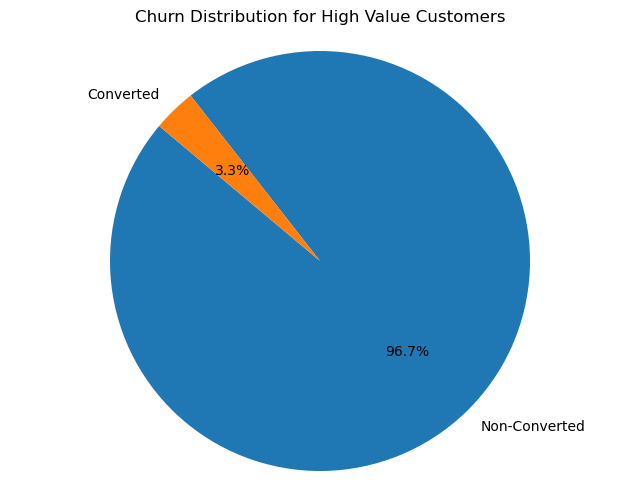

In [43]:
# Counting churn values
churn_counts = high_value_customers['churn'].value_counts()
labels=('Non-Converted', 'Converted')
# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution for High Value Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There is very little percentage of churn rate. We will take care of the class imbalance later.

Let's look into the final data set for analysis.

In [44]:
high_value_customers.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 124 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

The final dataset contains -
- Three columns of average revenue per user.
- Three columns of minutes of usage for all kind of calls within the same operator network
- Three columns of minutes of usage for all kind of calls outside the operator T network
- Six columns of minutes of usage of roaming calls - incoming and outgoing
- Fifteen columns of minutes of usage of various lines of local outgoing calls with the operator T
- Fifteen columns of minutes of usage of various lines of STD outgoing calls with the operator T
- Three columns of minutes of usage for ISD outgoing calls.
- Three columns of minutes of usage for Special outgoing calls.
- One column of outgoing calls in the month of June.
- Three columns of total outgoing calls.
- Twelve columns of minutes of usage for local incoming calls.
- Twelve columns of minutes of usage for STD incoming calls.
- Three columns of minutes of usage for Special and ISD incoming calls.
- Six columns of total recharges.
- Three columns of recharge amounts on the last day of the month.
- Eighteen columns of mobile internet usage.
- One column of Age on network
- Three columns of Volume based cost.
- The Churn column which is the target column.

<h1 style='color:darkviolet'> EXPLORATORY DATA ANALYSIS

<h2 style="color:green;"> 1. Univariate Analysis

<h3 style="color:blue;">  Average Revenue per User

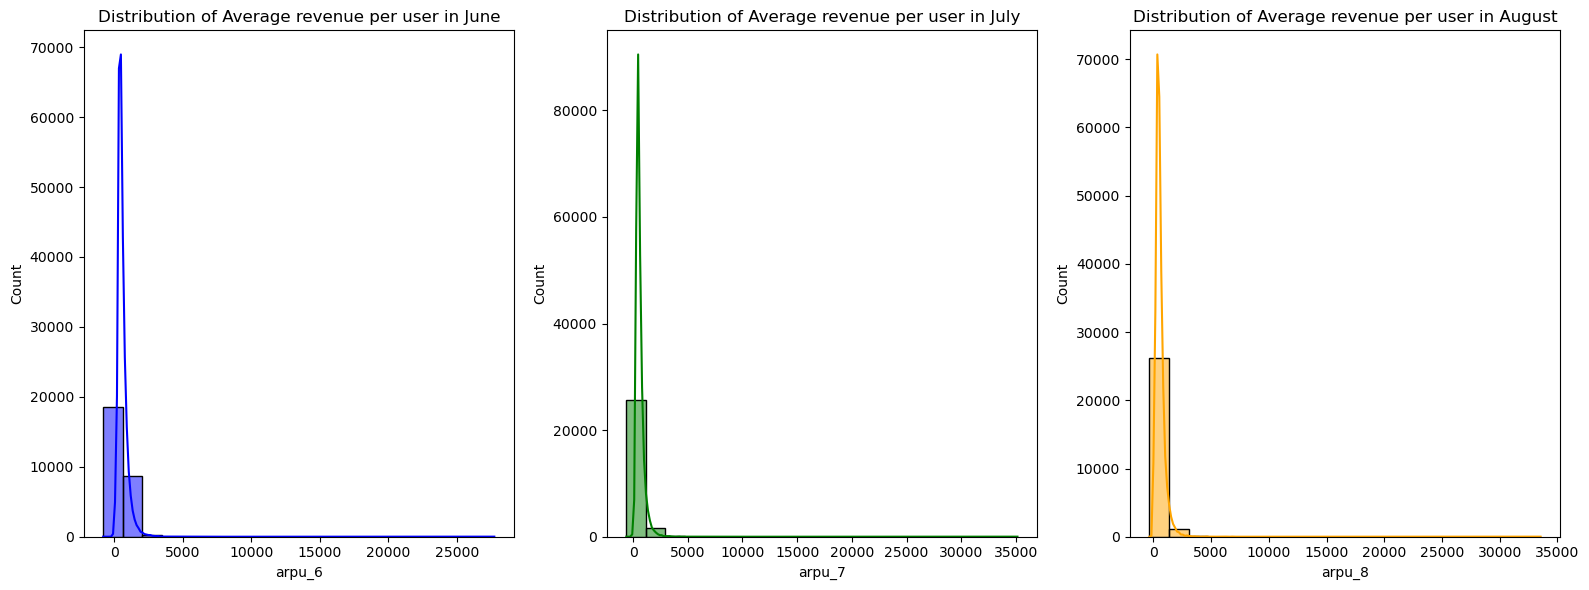

In [45]:
plt.figure(figsize=(16, 6))  

# Plotting the histograms in the one row
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
sns.histplot(high_value_customers['arpu_6'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average revenue per user in June')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
sns.histplot(high_value_customers['arpu_7'], bins=20, kde=True, color='green')
plt.title('Distribution of Average revenue per user in July')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
sns.histplot(high_value_customers['arpu_8'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average revenue per user in August')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- The distribution is skewed to the right, meaning that there are more users with a lower ARPU than users with a higher ARPU. 
- This is common for many business models, as a small percentage of users may be high spenders, while the majority of users may be low spenders. 
- The average ARPU appears to be higher in July and August compared to June.
- Overall, the graph suggests that there is a wide range of ARPU in these three months, with most users having a lower ARPU.

In [46]:
# Storing the colors in a variable named 'colors' to use them in the graphs
colors = ['blue', 'green', 'orange']

<h3 style="color:blue;"> Onnet calls per Month

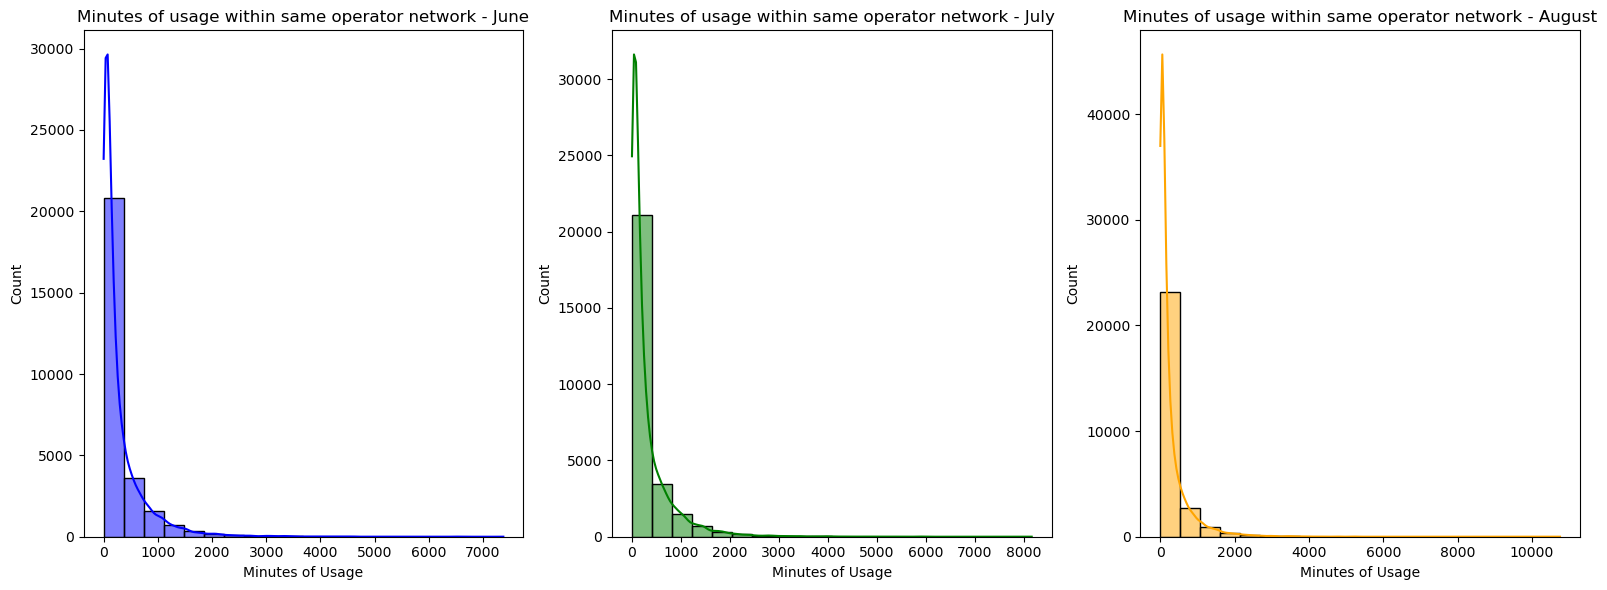

In [47]:
# Define the columns for onnet minutes of usage
onnet_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[onnet_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Minutes of usage within same operator network - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 
- Onnet calls were more frequent in June and July (Good phase) compared to August (Action phase). This is because the June and July lines trend higher than the August line across the entire range of minutes used.
- The most frequent call lengths were between 1000 and 2000 minutes for all three months. 
- Overall, the graph suggests that these telecom customers prefer longer on-net calls, with a potential rise during specific months. 

<h3 style="color:blue;"> Offnet calls per Month

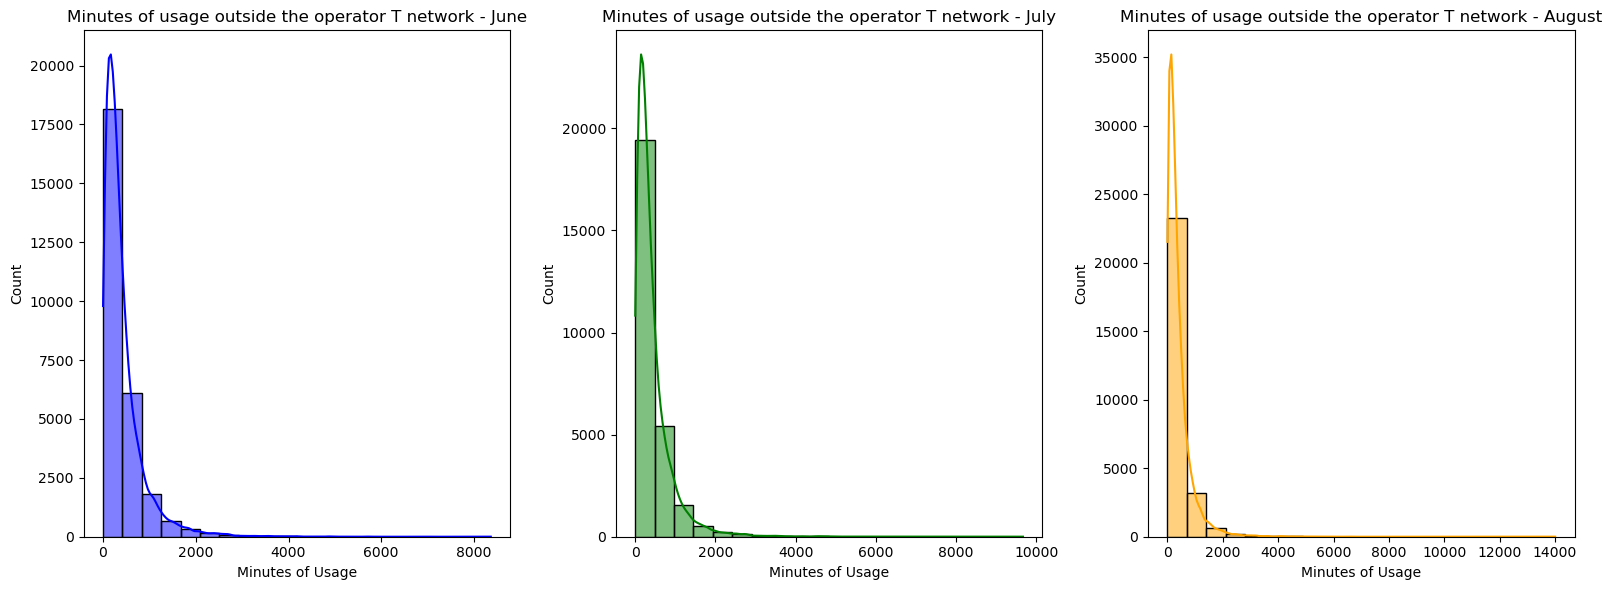

In [48]:
# Define the columns for onnet minutes of usage
offnet_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[offnet_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Minutes of usage outside the operator T network - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- Less calls being made to people outside of the network
- Over all, the graph suggests a steady decrease in the number of offnet minutes used between June and August. 

<h3 style="color:blue;"> Incoming calls in Roaming zone per Month

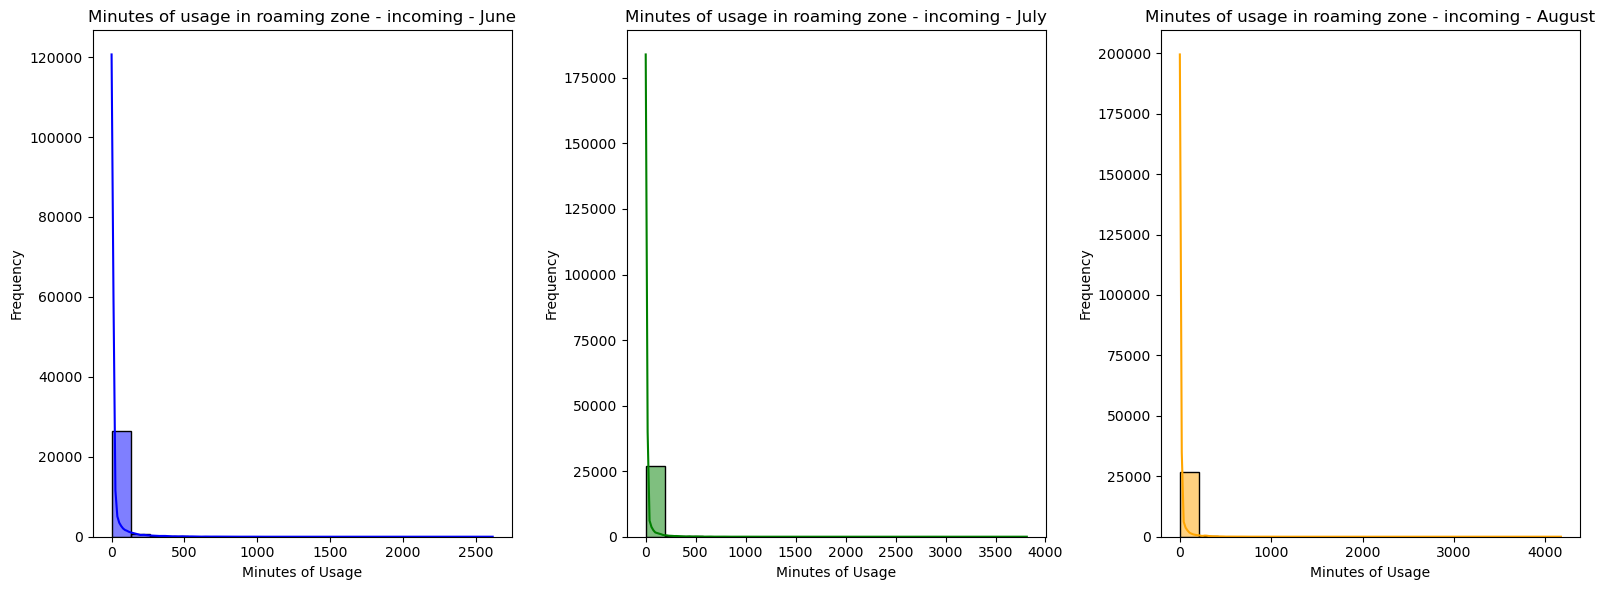

In [49]:
# Define the columns for roaming incoming minutes of usage
roaming_inc_cols = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[roaming_inc_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Minutes of usage in roaming zone - incoming - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- Based on the graph of incoming calls in roaming, we can infer that there is a gradual decrease in the number of minutes used for incoming calls while roaming from June to August. This suggests that telecom customers tend to use their phones more for incoming calls while roaming during the good phase months (June to July).

<h3 style="color:blue;"> Outgoing calls in Roaming zone per Month

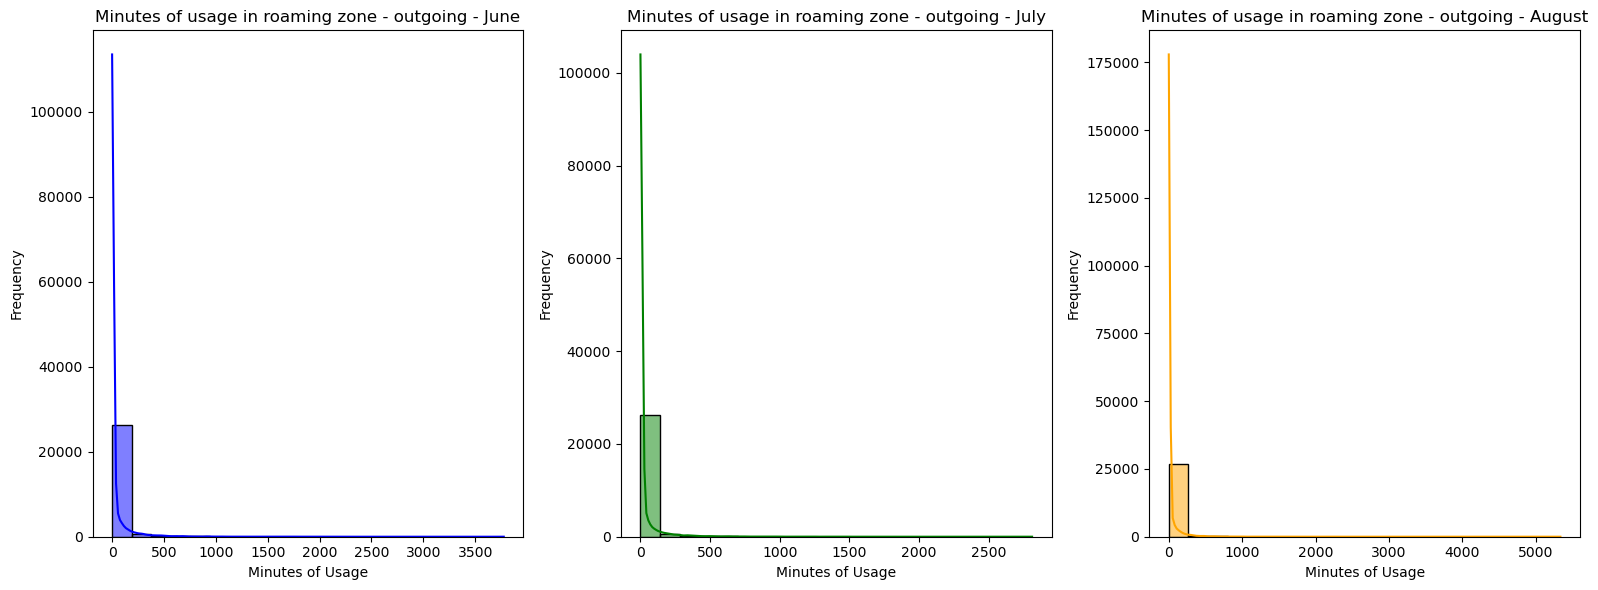

In [50]:
# Define the columns for romaing outgoing minutes of usage
roaming_og_cols = ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[roaming_og_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Minutes of usage in roaming zone - outgoing - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- There were fluctuations in the number of minutes used for outgoing roaming calls throughout the three months (June, July, August).
- Overall, July seems to be the month with the highest number of minutes used for outgoing roaming calls, followed by June and then August.

<h3 style="color:blue;"> Local Outgoing Calls

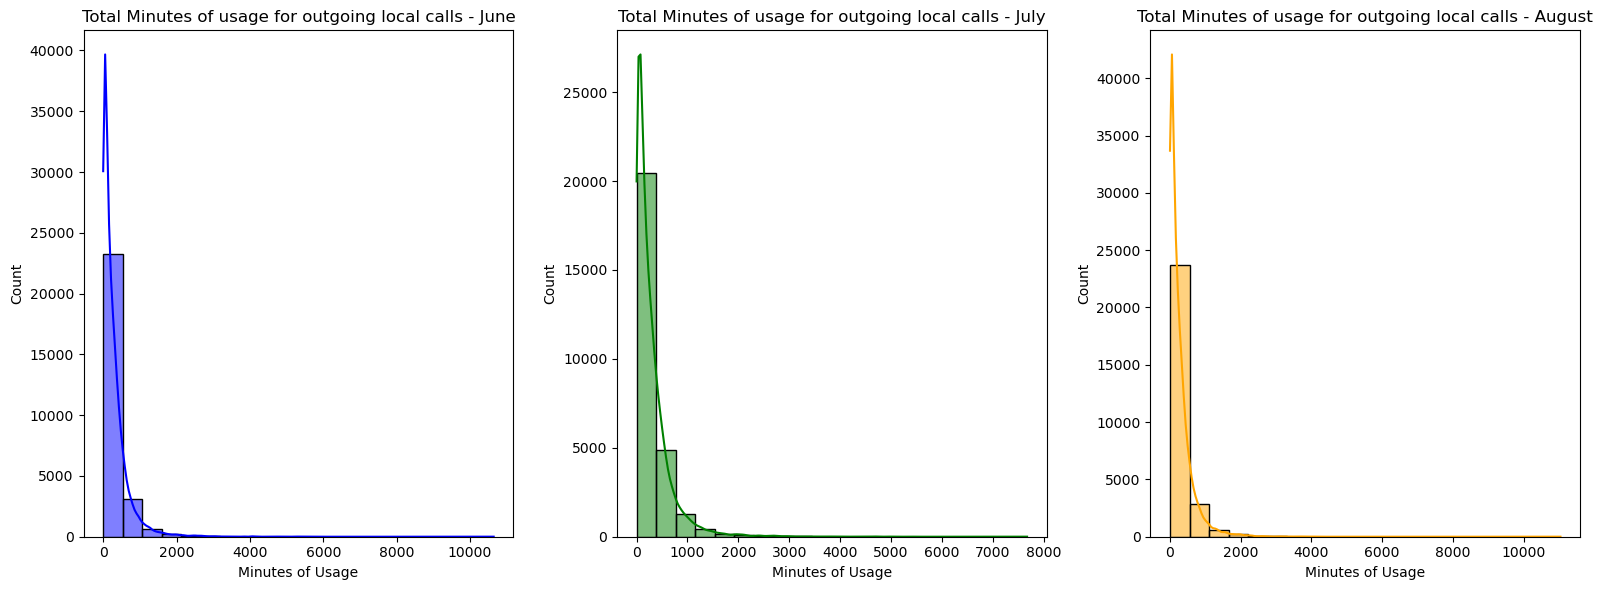

In [51]:
# Define the columns for local outgoing minutes of usage
loc_og_mou_cols = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[loc_og_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for outgoing local calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- The usage is high for good phase. It later decreases in the Action phase. The two graphs show local outgoing call minutes of usage, likely for two different billing periods. 
- Both graphs show a similar pattern. The call minutes usage starts low and then increases over time. This suggests that there may have been more outgoing local calls made at the end of the billing period than at the beginning.

<h3 style="color:blue;"> STD outgoing calls

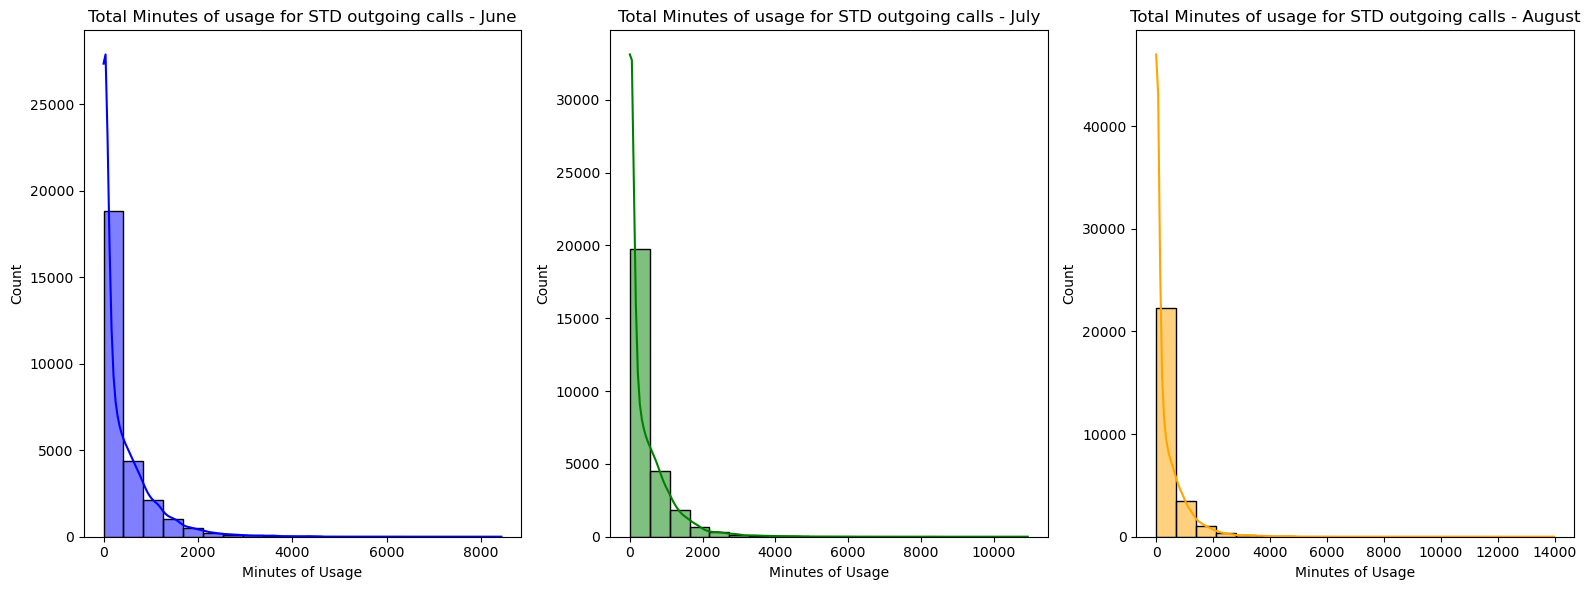

In [52]:
# Define the columns for STD outgoing minutes of usage
std_og_mou_cols = ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, plot index 
    sns.histplot(high_value_customers[std_og_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for STD outgoing calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- The total minutes of outgoing STD calls decreased from June to August. This suggests that people made less long-distance calls during this time period. 
- In all three months (June, July, August), the frequency of outgoing calls was highest between 10 and 1500 minutes. This suggests that most long-distance calls were relatively short in duration.

<h3 style="color:blue;"> ISD Outgoing calls

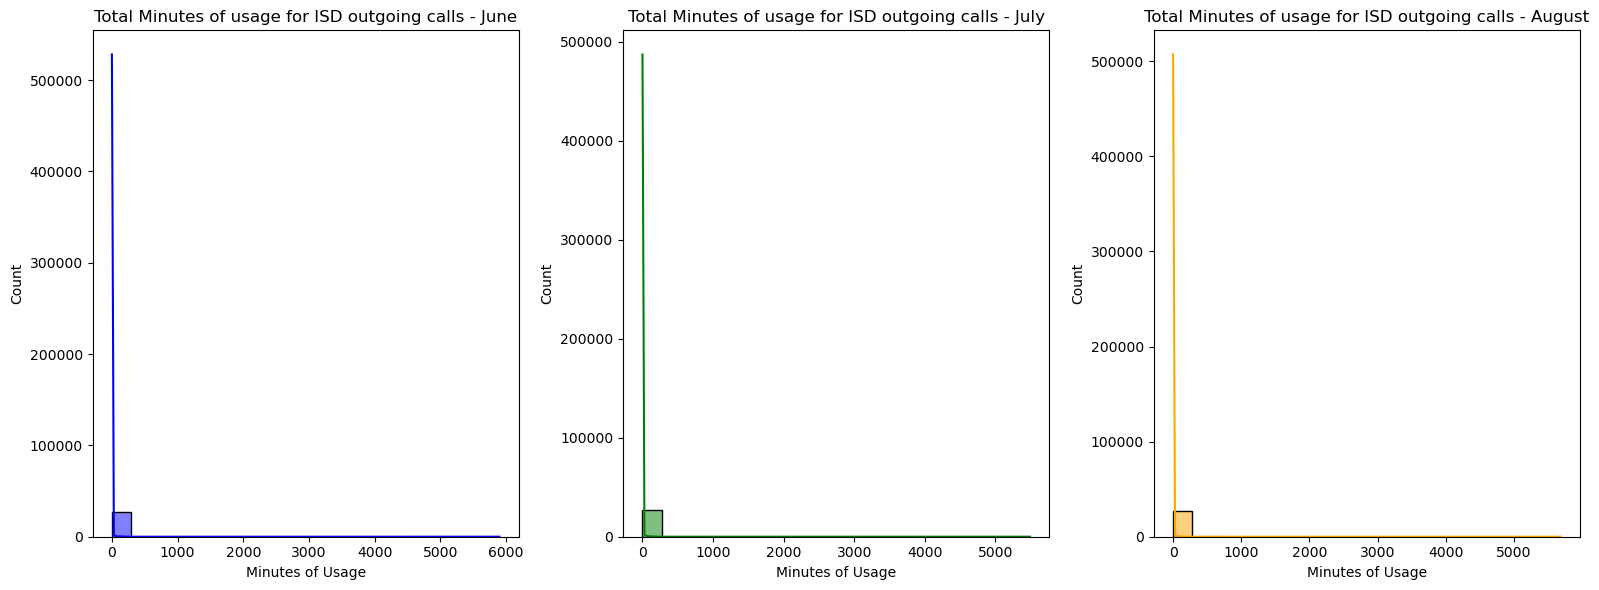

In [53]:
# Define the columns for ISD outgoing minutes of usage
isd_og_mou_cols = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[isd_og_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for ISD outgoing calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- Based on the graph of outgoing ISD calls, it is likely that telecom customers make more outgoing ISD calls during the day than during the night. The highest frequency of outgoing calls is between 10 and 400 minutes, and no inference can be drawn for customer churn.

<h3 style="color:blue;"> Special Outgoing calls

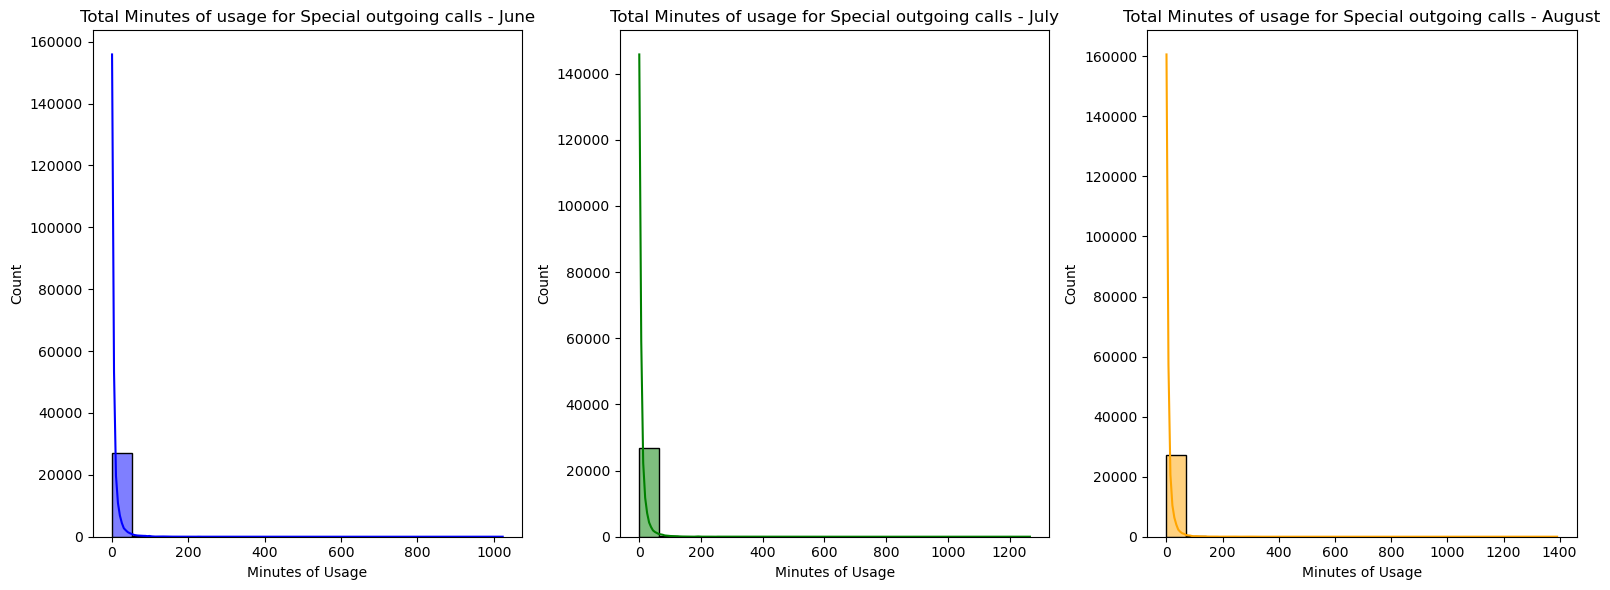

In [54]:
# Define the columns for Special outgoing minutes of usage
spl_og_mou_cols = ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[spl_og_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for Special outgoing calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- It is difficult to draw any specific inferences about churn customers based on this graph.

<h3 style="color:blue;"> Total Outgoing calls

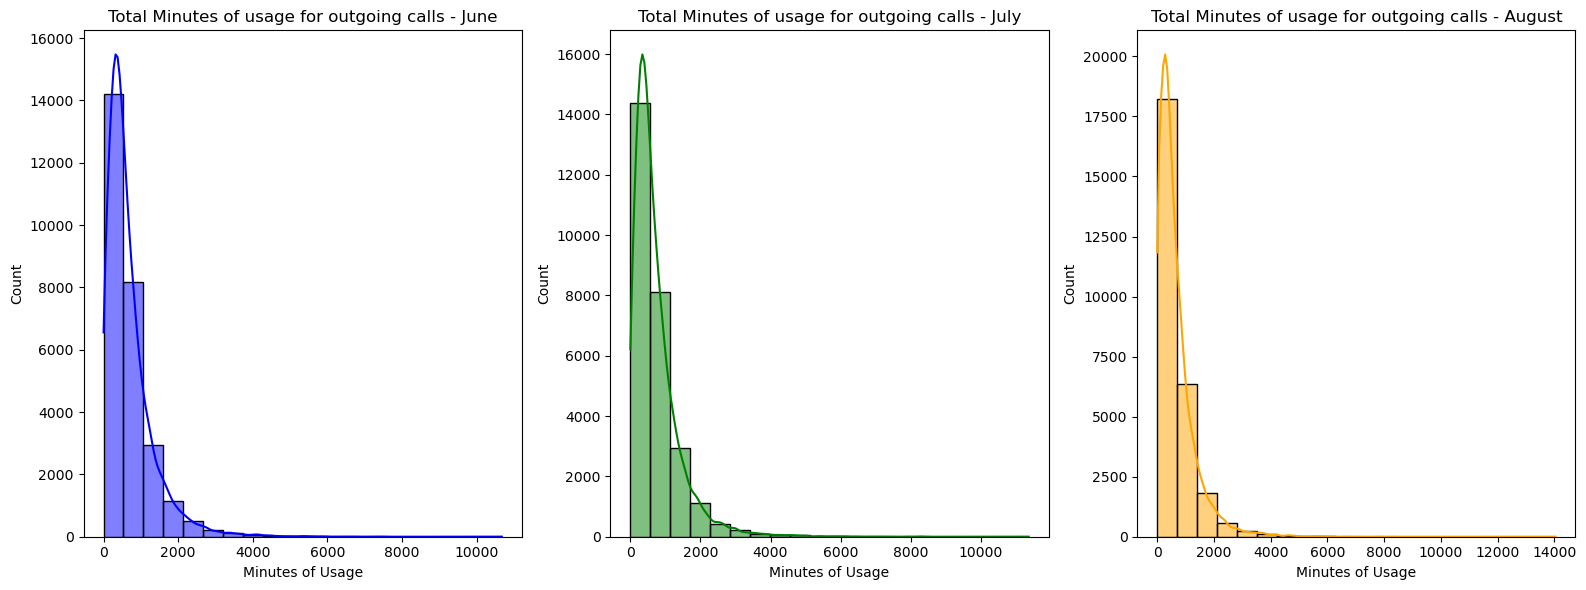

In [55]:
# Define the columns for total outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[total_og_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for outgoing calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- A higher frequency of customers tend to make calls that last between 100 and 1500 minutes in June. There are around 8,000 customers in this range.
- There is a steady decline in the frequency of customers as the number of minutes used for outgoing calls increases.
- Very few customers make outgoing calls that last longer than 3,000 minutes. There are less than 2,000 customers in this range.

**Customer Segmentation and Targeting:**

- High-Value Customers: The segment with the highest frequency (1,500-4,000 minutes) represents potential high-value customers. They generate significant call revenue and could be targeted with special offers for increased loyalty or upselling premium plans with higher call allowances.
- Low-Usage Customers: The significant decline at the higher end suggests a large number of low-usage customers who might be on plans exceeding their needs. These customers could be targeted with more data-centric plans or lower call minute packages.

<h3 style="color:blue;"> Total incoming calls

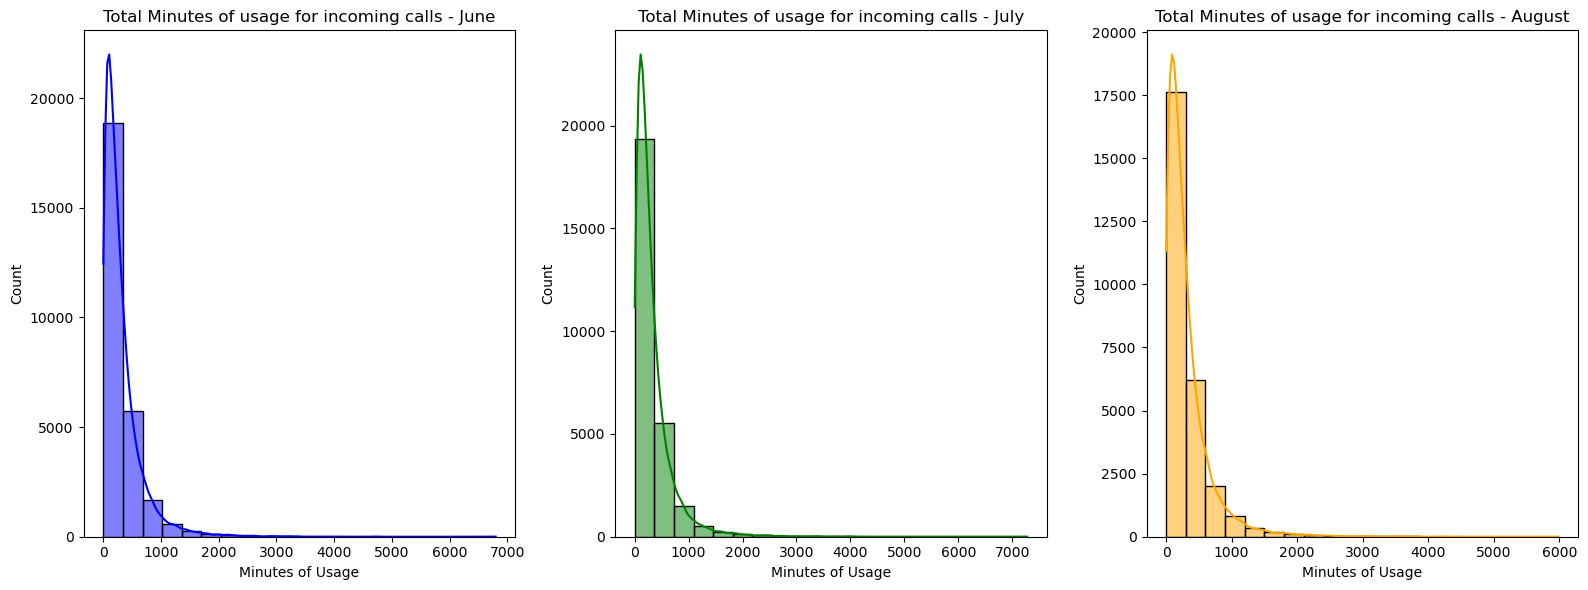

In [56]:
# Define the columns for total incoming minutes of usage
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[total_ic_mou_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Minutes of usage for incoming calls - {month.capitalize()}')
    plt.xlabel('Minutes of Usage')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference**

- The most frequent call duration is between 0 and 2000 minutes.
- There are a significant number of calls that last less than 1000 minutes.


**Customer Segmentation and Service Plans:**

- High Usage Customers: The high frequency of calls between 1000-2000 minutes suggests a segment of customers who make frequent longer calls. This could be an opportunity to target these customers with specific plans offering higher call bundles or unlimited minutes.
- Low Usage Customers: The significant number of calls lasting less than 1000 minutes indicates a segment of users who make shorter calls infrequently. These customers might benefit from pay-as-you-go plans or data-centric plans with limited voice options.

**Customer Service and Churn:**
- Identifying Potential Frustration Points: A high concentration of very short calls (under a minute) might indicate customers abandoning calls due to frustration. Analyzing these calls with other data (e.g., call recordings, customer surveys) could reveal areas where the self-service options or automated menus need improvement.

**Network Capacity Planning:**

- Peak Usage Periods: The graph can help identify peak call usage periods based on the most frequent call durations. This information can be used for network capacity planning to ensure enough bandwidth is available to handle these peak times and avoid call drops or congestion.

<h3 style="color:blue;"> Recharge Habit Analysis

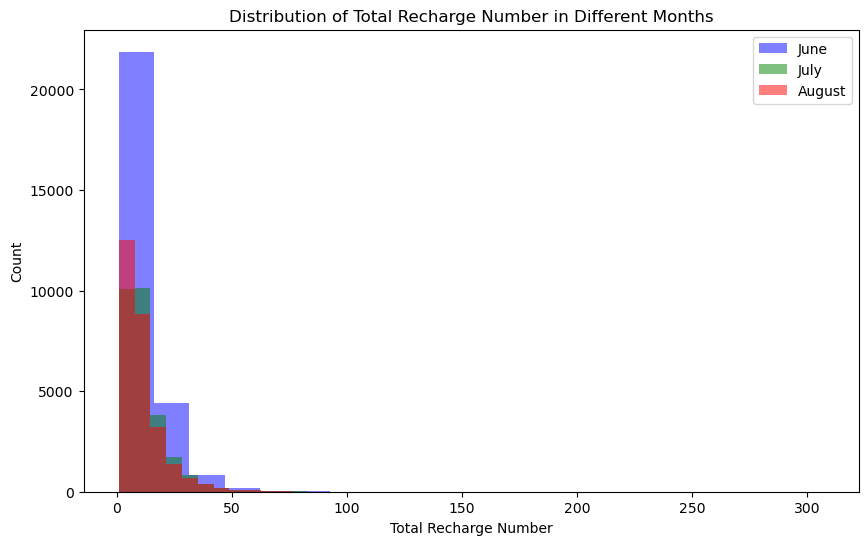

In [57]:
# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot histogram for total_rech_num_6
plt.hist(high_value_customers['total_rech_num_6'], bins=20, alpha=0.5, color='blue', label='June')
# Plot histogram for total_rech_num_7
plt.hist(high_value_customers['total_rech_num_7'], bins=20, alpha=0.5, color='green', label='July')
# Plot histogram for total_rech_num_8
plt.hist(high_value_customers['total_rech_num_8'], bins=20, alpha=0.5, color='red', label='August')

# Add labels and title
plt.xlabel('Total Recharge Number')
plt.ylabel('Count')
plt.title('Distribution of Total Recharge Number in Different Months')

# Add legend
plt.legend()

# Show plot
plt.show()

**Inference -**

- Based on the graph, it appears that there are more telecom customers who tend to recharge their phones with smaller amounts (between 0 and 50) compared to those who recharge with larger amounts (between 250 and 300). The highest frequency of customers is around 50, and the frequency steadily decreases as the recharge amount increases.

- There could be a few reasons for this. One possibility is that many customers on prepaid plans only top up their phones with small amounts when they are running low on credit. Another possibility is that some customers may have postpaid plans with monthly fees that cover their typical usage, so they only need to top up occasionally for additional usage.

- It's important to note that this graph doesn't show the total amount of money recharged, only the number of recharges at each amount. So, it's possible that even though there are more customers recharging smaller amounts, the total revenue from customers who recharge larger amounts could be higher. 

<h3 style="color:blue;"> Total Recharge Amount

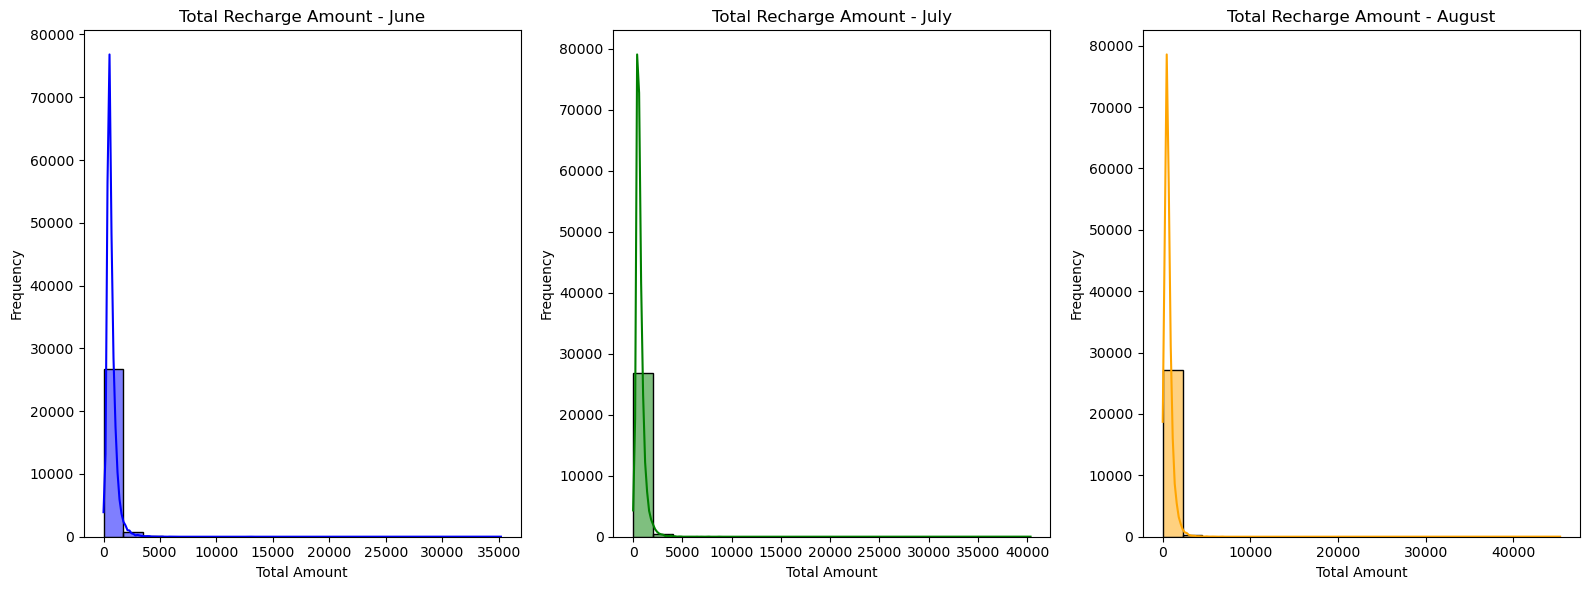

In [58]:
# Define the columns for total Recharges
total_rech_amt_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[total_rech_amt_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Total Recharge Amount - {month.capitalize()}')
    plt.xlabel('Total Amount')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -** 

- There appears to be a higher frequency of customers who tend to recharge between ₹0 and ₹2,500 (across both sets of data).
- There are a relatively small number of customers who recharge for very high amounts (over ₹10,000).

**Customer Segmentation:**

- Value Segments: The graph suggests a potential segmentation of customers based on their average recharge amount. There could be a segment of high spenders who recharge for ₹5000 or more, a mid-tier segment who recharge for moderate amounts, and a budget segment who recharge for smaller amounts.
- Usage Patterns: Analyzing recharge frequency alongside recharge amount can reveal usage patterns. Customers who recharge frequently for smaller amounts might be on pay-as-you-go plans, while those who recharge infrequently for larger amounts might be on fixed monthly plans.

**Pricing and Marketing Strategies:**

- Targeted Promotions: Knowing the most frequent recharge range (₹1,000 - ₹5,000) allows targeted promotions for these customers. This could be offering bonus data or talk time with recharges in this range.
- Plan Optimization: The data can help assess the effectiveness of existing plans. Are there enough options for high spenders who might be better suited for postpaid plans?
- Customer Acquisition: Understanding recharge habits can inform customer acquisition strategies. Are there attractive offers for budget-conscious customers who might be enticed to switch providers?

<h3 style="color:blue;"> Maximum Recharge amount 

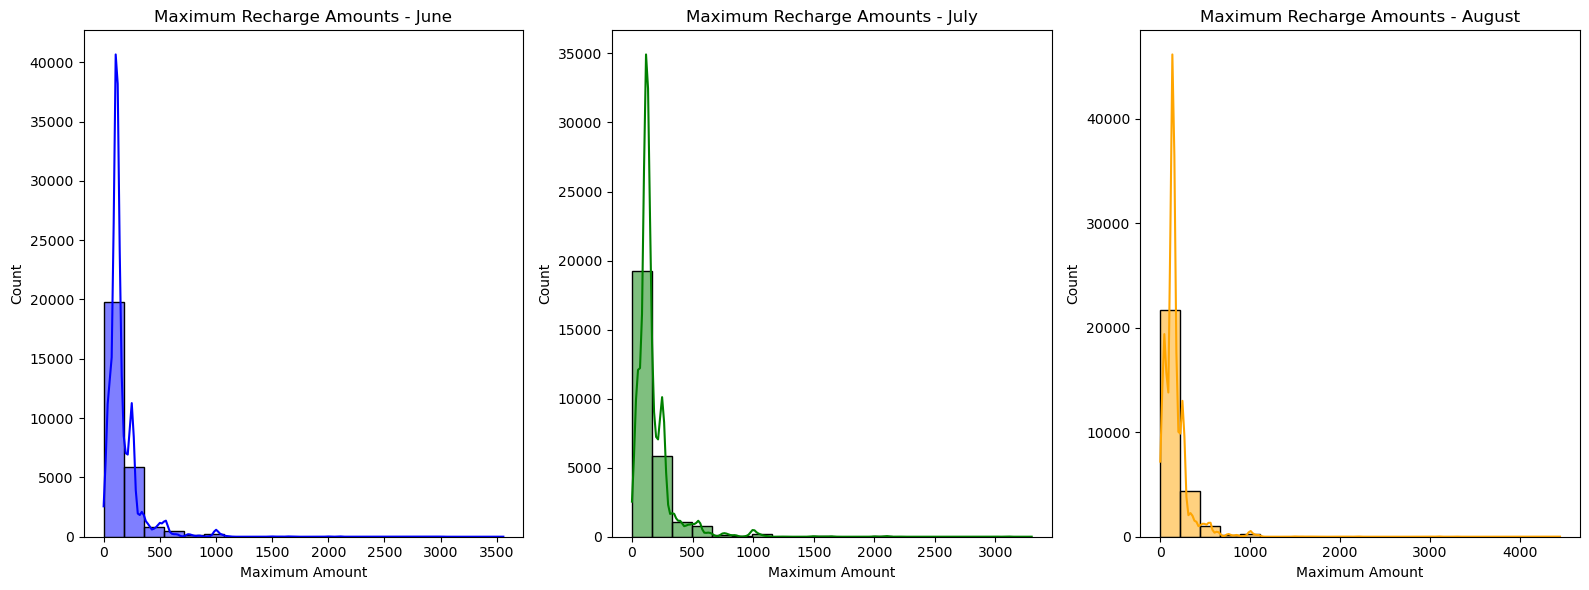

In [59]:
# Define the columns for total Recharges
max_rech_amt_cols = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[max_rech_amt_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Maximum Recharge Amounts - {month.capitalize()}')
    plt.xlabel('Maximum Amount')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -**

- The maximum recharge amount appears to be higher in June than in July or August.
- In June, the most frequent recharge amount falls between 10 and 500. In July and August, the most frequent recharge amount falls between 100 and 1000.
- It is difficult to say definitively from this graph whether there is a statistically significant difference in the distribution of recharge amounts across the three months.
- Overall, the graph suggests that there is a variation in the maximum recharge amount over the three summer months. June appears to have the highest maximum recharge amount, while July and August have lower maximum recharge amounts.

<h3 style="color:blue;"> Recharge amount on the last day of the month

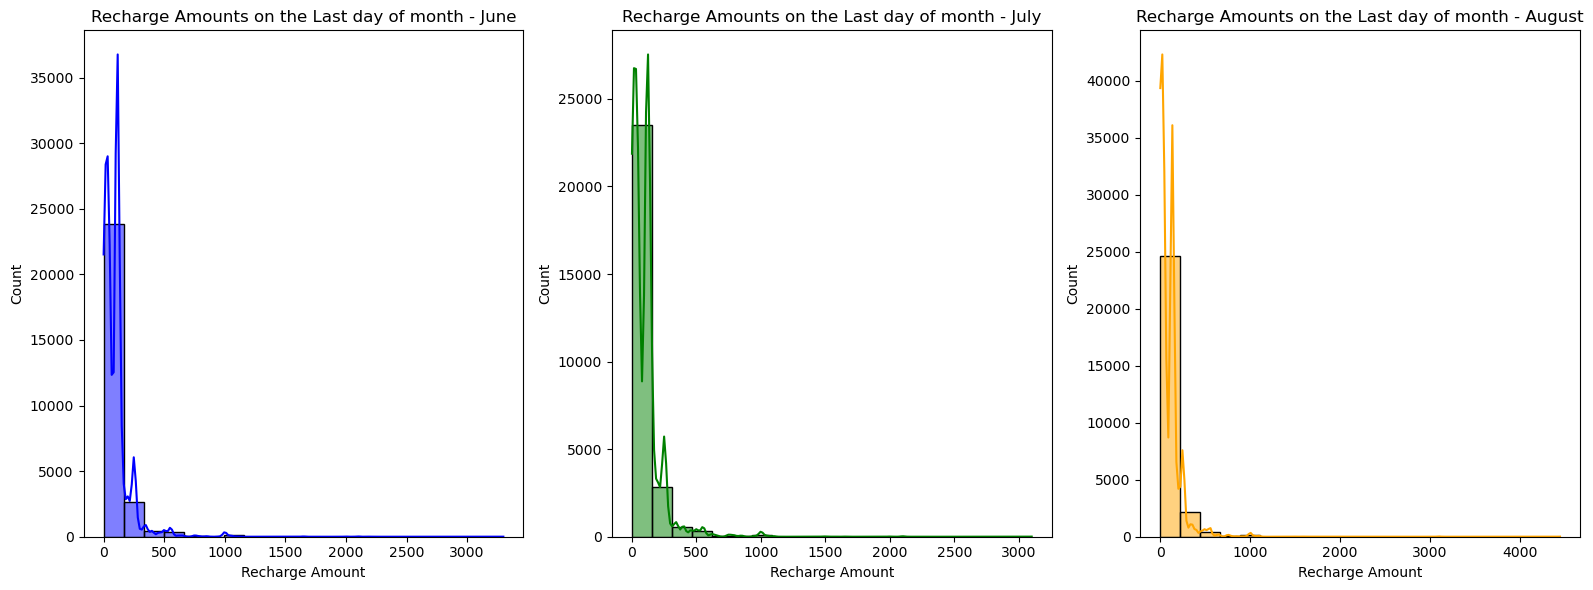

In [60]:
# Define the columns for total Recharges
last_day_rch_amt_cols = ['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

# Create the figure and subplots
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed

# Plot histograms for each month
for i, month in enumerate(['June', 'July', 'August'], start=1):
    plt.subplot(1, 3, i)  # 1 rows, 3 columns, plot index 
    sns.histplot(high_value_customers[last_day_rch_amt_cols[i-1]], bins=20, kde=True, color=colors[i-1])
    plt.title(f'Recharge Amounts on the Last day of month - {month.capitalize()}')
    plt.xlabel('Recharge Amount')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

**Inference -**

- In all three months (June, July, August) the most frequent recharge amount falls between Rs. 0 and Rs. 500.
- The frequency of customers recharging for amounts above Rs. 250 seems to be higher in July compared to June and August.
- There are also more customers recharging for amounts below Rs. 500 in July compared to June and August.
- Overall, the distribution of recharge amounts appears to be similar across the three months, with a slight decrease in the frequency of higher recharge amounts in August.

**Customer Preferences:**

- Rs. 500 -1500,000 recharge range: This appears to be the sweet spot for most customers. Consider offering plans or promotions targeted specifically within this range.
- Price sensitivity: The decrease in higher recharge amounts in July and August suggests some price sensitivity among customers. Analyze if offering flexible recharge options or data rollover plans might be beneficial.

**Marketing Strategies:**

- Promotional effectiveness: If June had promotions that led to higher recharge amounts, explore replicating similar campaigns to boost customer spending in other months.
- Understanding seasonal variations: Investigate if there are consistent seasonal trends in recharge behavior. Tailor marketing campaigns and promotions to address these trends (e.g., summer data usage).

**Product Development:**

- Plan optimization: Analyze the distribution of recharge amounts to see if existing recharge plans align with customer preferences. Consider introducing new plans or adjusting existing ones to cater to the Rs. 1,000-2,000 range.
- Data rollover options: Customers might be hesitant to recharge large amounts upfront. Explore offering data rollover plans that allow them to carry over unused data to the next month, potentially encouraging higher recharge amounts overall.


<h3 style="color:blue;"> Volume used for 2G and 3G data in the three months

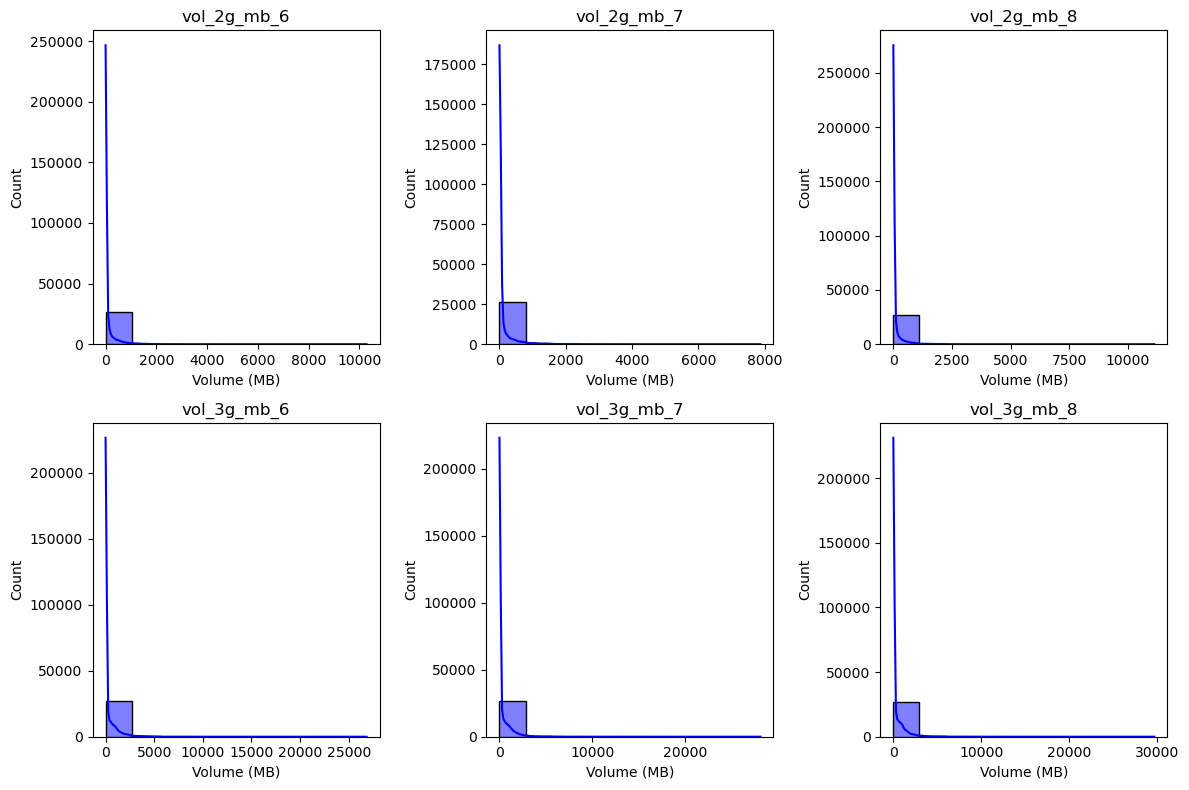

In [61]:
plt.figure(figsize=(12, 8))

# Plot histograms for each column
for i, column in enumerate(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(high_value_customers[column], bins=10, kde=True, color='blue')
    plt.title(column)
    plt.xlabel('Volume (MB)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Inference -** 

- The 2G data used by maximum customers range from 0 to 1000 Mb (~1 GB)
- The 3G data used by maximum customers range from 0 to 2500 Mb (~2.5 GB)

<h3 style="color:blue;"> Monthly 2G and 3G data

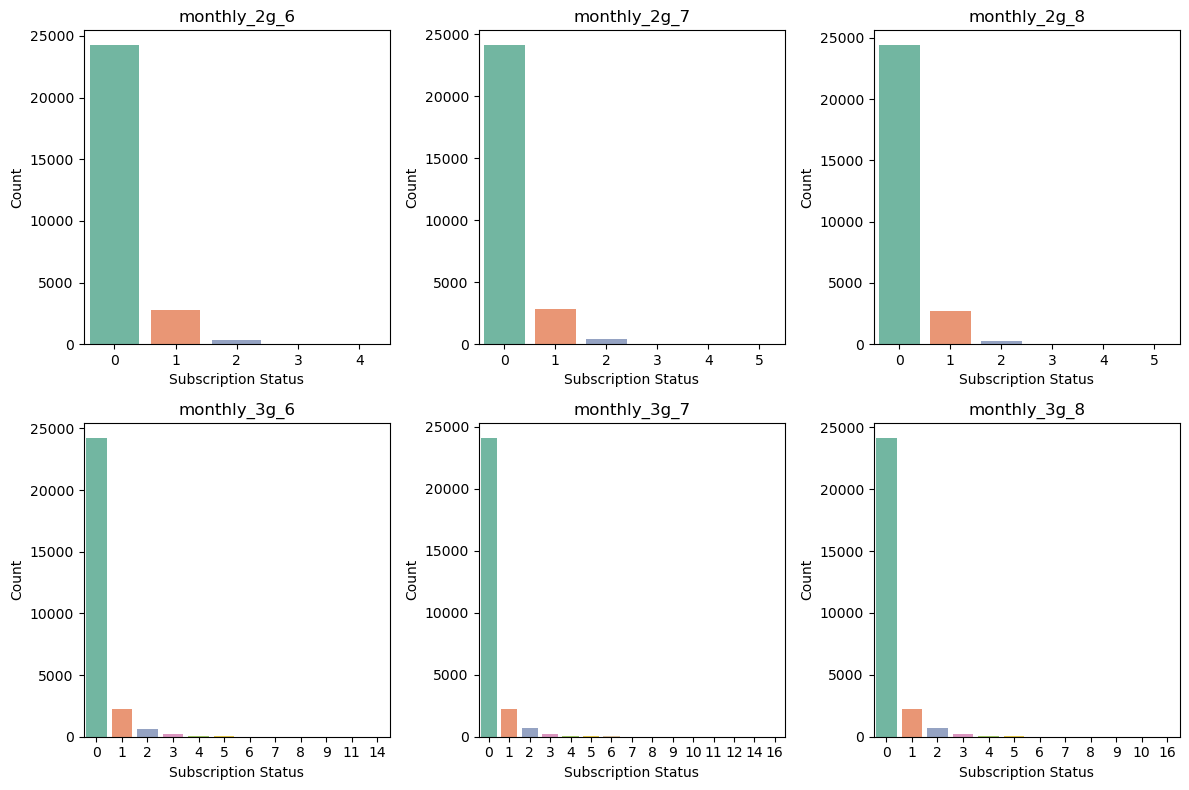

In [62]:
plt.figure(figsize=(12, 8))

# Plot countplots for each column
for i, column in enumerate(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=high_value_customers, palette='Set2')
    plt.title(column)
    plt.xlabel('Subscription Status')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Inference -** 

- The distribution of subscriptions across subscription status appears to be similar across all three months (monthly_2g_6, monthly_2g_7, monthly_2g_8, monthly_3g_6, monthly_3g_7, and monthly_3g_8). 
- In each month, there apears to be a high number of subscriptions with a status of 0, and a steady decline in the number of subscriptions as the subscription status value increases.

<h3 style="color:blue;"> Service schemes with validity smaller than a month

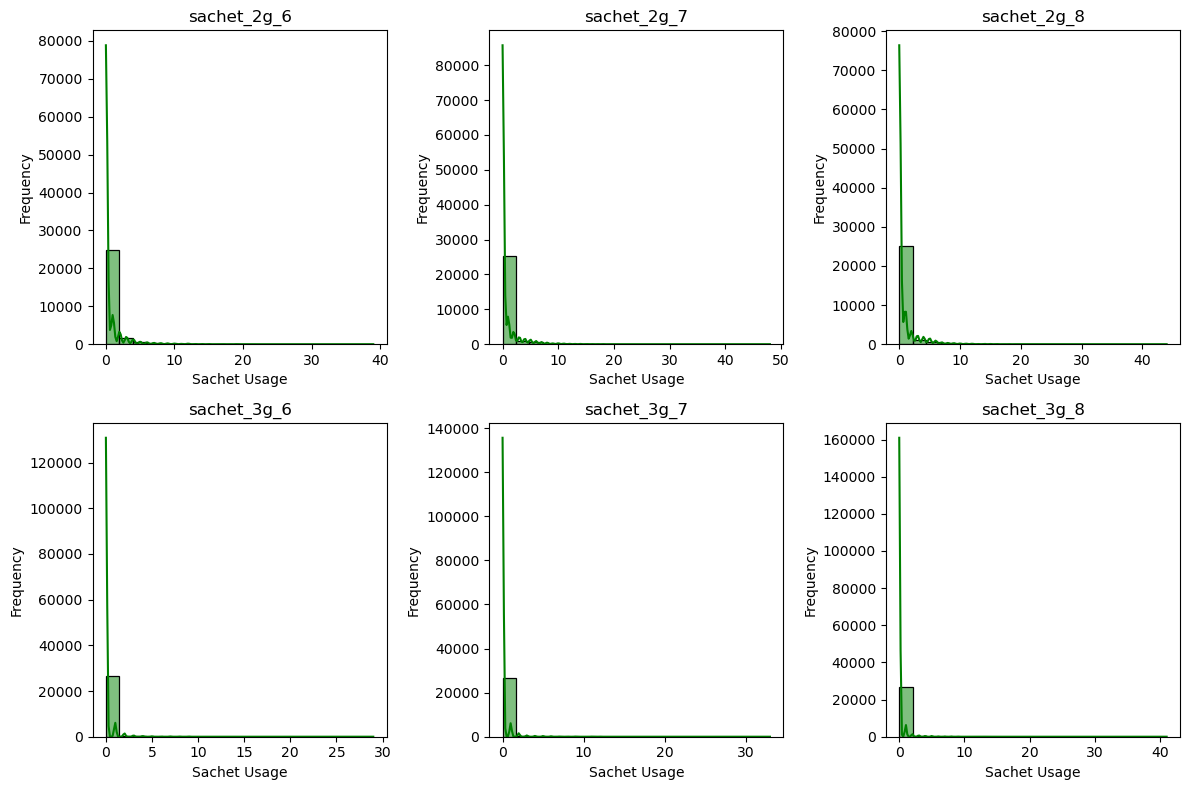

In [63]:
plt.figure(figsize=(12, 8))

# Plot histograms for each column
for i, column in enumerate(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(high_value_customers[column], bins=20, kde=True, color='green')
    plt.title(column)
    plt.xlabel('Sachet Usage')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Inference -** 

- There is a general upward trend in usage for all three sachets over the period depicted in the graph.
- Sachet 2g_8 (August) appears that the customers have used the data more frequently than the other months.

<h3 style="color:blue;"> Age on Network by all the customers

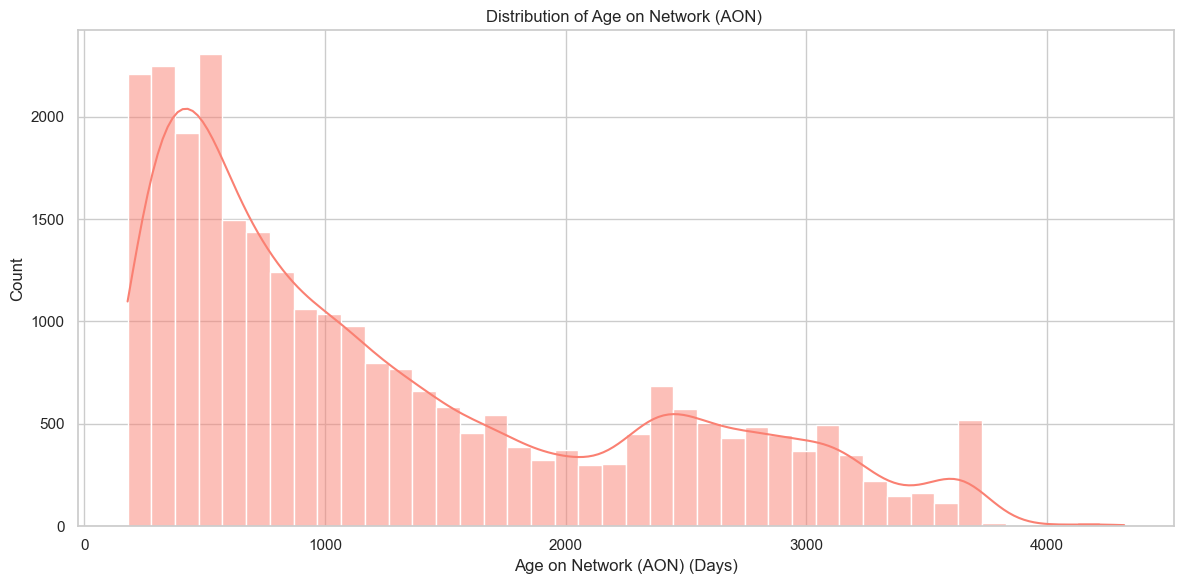

In [64]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 6))
sns.histplot(data=high_value_customers, x='aon', kde=True, color='salmon')
plt.title('Distribution of Age on Network (AON) ')
plt.xlabel('Age on Network (AON) (Days)')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Inference -** 

- The graph shows that there are a lot of users on the network who are between 1000 and 2000 days old (which is roughly between 2.7 and 5.4 years old). 
- There are also a significant number of users who are between 2000 and 3000 days old (which is roughly between 5.4 and 8.2 years old). 
- The number of users then tails off at higher ages.
- It appears that the average age is likely somewhere between 2.7 and 8.2 years old.

<h3 style="color:blue;"> Volume Based Cost (VBC) for the 3G network across the months of June, July, and August

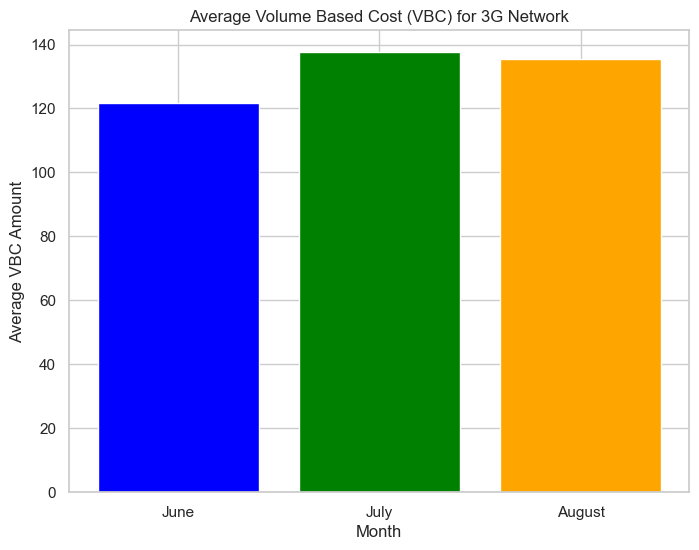

In [65]:
# Extracting the VBC data for each month
jun_vbc = high_value_customers['jun_vbc_3g'].mean()
jul_vbc = high_value_customers['jul_vbc_3g'].mean()
aug_vbc = high_value_customers['aug_vbc_3g'].mean()

# Creating lists for the data
months = ['June', 'July', 'August']
vbc_amounts = [jun_vbc, jul_vbc, aug_vbc]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(months, vbc_amounts, color=colors)
plt.title('Average Volume Based Cost (VBC) for 3G Network')
plt.xlabel('Month')
plt.ylabel('Average VBC Amount')
plt.show()

**Inference -** 

- Each bar represents the average VBC amount for the corresponding month.
- The cost is highest in July, then lowest in June, and then rises again in August. 

<h1 style="color:green;"> 2. Bivariate Analysis

<h3><i>Deriving new columns for analysis

<h3 style="color:blue;">  1. Average revenue per user (ARPU)

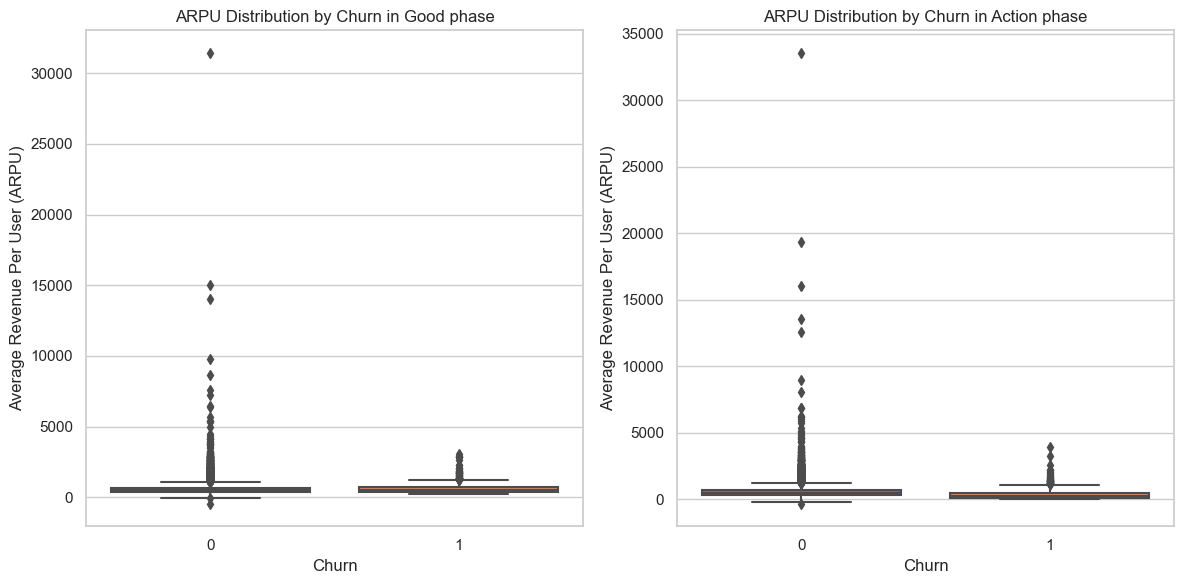

In [66]:
# Average revenue per user (ARPU) in the good phase
high_value_customers['avg_arpu_6_7'] = (high_value_customers['arpu_6'] + high_value_customers['arpu_7']) / 2

# Average revenue per user (ARPU) in the good phase

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='avg_arpu_6_7', data=high_value_customers)
plt.title('ARPU Distribution by Churn in Good phase')
plt.xlabel('Churn')
plt.ylabel('Average Revenue Per User (ARPU)')

# Average revenue per user (ARPU) in the Action phase
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='arpu_8', data=high_value_customers)
plt.title('ARPU Distribution by Churn in Action phase')
plt.xlabel('Churn')
plt.ylabel('Average Revenue Per User (ARPU)')
plt.tight_layout()
plt.show()

**Inference -** 

- In both graphs, the ARPU appears to be higher for users with lower churn.  
- In the “Good” phase graph, the ARPU starts at around ₹100 and steadily increases to around ₹4,000 as churn increases. 
- In the “Action” phase graph, the ARPU starts at around ₹100 and also steadily decreases to around ₹5,000 as churn increases.
- There are outliers in both the phases

<h3 style="color:blue;"> 2. Minutes of usage (MOU) Outgoing

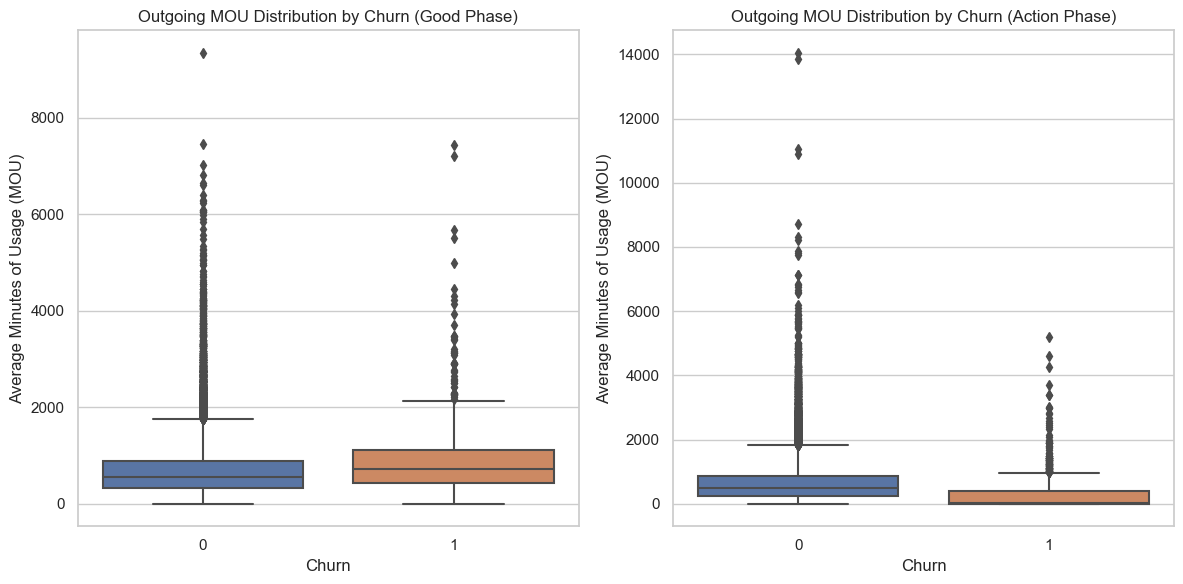

In [67]:
# Distribution of Outgoing minutes of usage (MOU) in the good phase and Action Phase
# Calculate average outgoing MOU (Minutes of usage - voice calls) for the good phase
outgoing_mou_cols = ['total_og_mou_6', 'total_og_mou_7']
high_value_customers['avg_outgoing_mou_6_7'] = high_value_customers[outgoing_mou_cols].mean(axis=1)

plt.figure(figsize=(12, 6))

# Subplot 1: Outgoing MOU Distribution by Churn (Good Phase)
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='avg_outgoing_mou_6_7', data=high_value_customers)
plt.title('Outgoing MOU Distribution by Churn (Good Phase)')
plt.xlabel('Churn')
plt.ylabel('Average Minutes of Usage (MOU)')

# Subplot 2: Outgoing MOU Distribution by Churn (Action Phase)
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='total_og_mou_8', data=high_value_customers)
plt.title('Outgoing MOU Distribution by Churn (Action Phase)')
plt.xlabel('Churn')
plt.ylabel('Average Minutes of Usage (MOU)')

plt.tight_layout()
plt.show()

**Inference -** 
- The good phase churn group has a higher median outgoing minutes of usage than the action phase churn group. 
- The good phase churn group also has a wider range of outgoing minutes of usage, with more outliers on both the high and low ends. 

**Business perspective:**

- **Customer Engagement:** Customers in the good churn phase (presumably happier customers) tend to use the service for longer durations (higher median) compared to those in the action churn phase (potentially at-risk customers). This suggests a correlation between usage and customer satisfaction.
- **Usage Variability:** The wider box and outliers in the good churn phase indicate more variable usage patterns. Some highly satisfied customers might use the service very frequently, while others might use it moderately but consistently.
- **Identifying At-Risk Customers:** The tighter box and fewer outliers in the action phase churn group suggest a more uniform usage pattern. This might help identify customers with lower engagement and potentially target them with interventions to improve their experience and prevent churn.

<h3 style="color:blue;">  3. Minutes of usage (MOU) Incoming

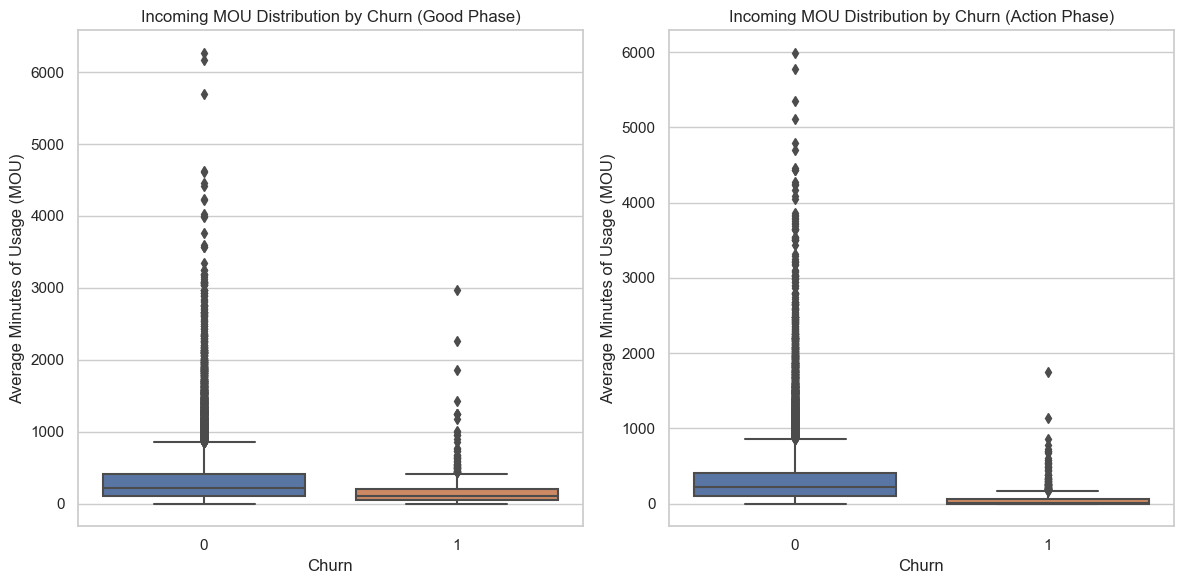

In [68]:
# Distribution of Incoming minutes of usage (MOU) in the good phase and Action Phase

# Calculate average incoming MOU (Minutes of usage - voice calls) for the good phase
incoming_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7']
high_value_customers['avg_incoming_mou_6_7'] = high_value_customers[incoming_mou_cols].mean(axis=1)


plt.figure(figsize=(12, 6))

# Subplot 1: Outgoing MOU Distribution by Churn (Good Phase)
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='avg_incoming_mou_6_7', data=high_value_customers)
plt.title('Incoming MOU Distribution by Churn (Good Phase)')
plt.xlabel('Churn')
plt.ylabel('Average Minutes of Usage (MOU)')

# Subplot 2: Outgoing MOU Distribution by Churn (Action Phase)
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='total_ic_mou_8', data=high_value_customers)
plt.title('Incoming MOU Distribution by Churn (Action Phase)')
plt.xlabel('Churn')
plt.ylabel('Average Minutes of Usage (MOU)')

plt.tight_layout()
plt.show()

**Inference-**

- The good phase graph shows that customers who stuck with the service (low churn) generally used the service for longer durations than those in the action phase (where churn is more likely).

**Importance of Call Time:**

- Engagement: The graph suggests a correlation between call duration and customer retention. Longer call times might indicate higher engagement with the service, leading to greater satisfaction and lower churn.

**Actionable Insights:**

- Understanding Needs: The good phase data provides a benchmark for ideal customer behavior (longer call times, lower churn). Analyzing the action phase (shorter calls, higher churn) can help identify areas where the service might not be meeting customer needs.
- Improving Engagement: By understanding why calls in the action phase are shorter, businesses can take steps to improve user experience and increase engagement. 
- Segmentation: The graphs might suggest different customer segments. Analyzing churn and call time by segment can help tailor strategies to address specific needs and improve overall retention.

<h3 style="color:blue;">  4. Age on Network (AON)

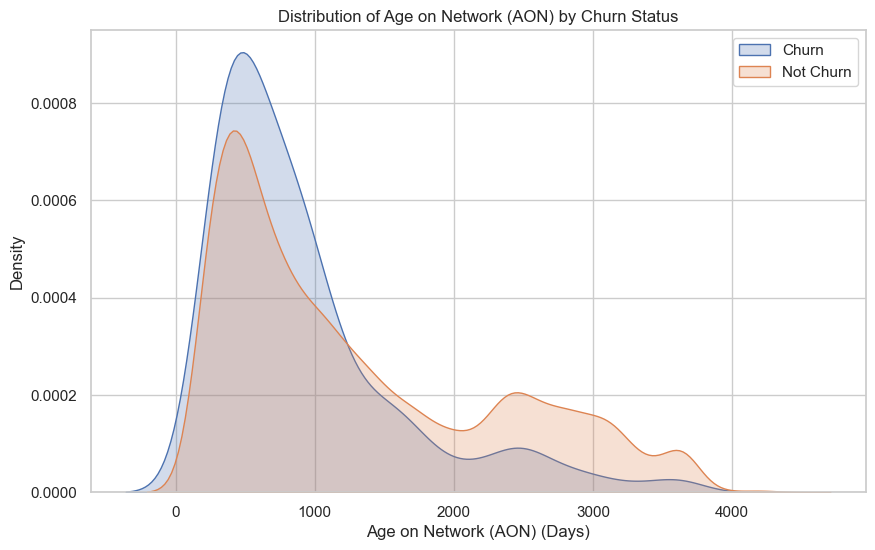

In [69]:
# Set the style
sns.set(style="whitegrid")

# Create the distplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=high_value_customers[high_value_customers['churn'] == 1]['aon'], label='Churn', shade=True)
sns.kdeplot(data=high_value_customers[high_value_customers['churn'] == 0]['aon'], label='Not Churn', shade=True)

# Set labels and title
plt.title('Distribution of Age on Network (AON) by Churn Status')
plt.xlabel('Age on Network (AON) (Days)')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()

**Inference -** 

- The graph appears to show that customers who churn have a lower AON than customers who do not churn. 
- The density function for churned customers is higher at the lower end of the x-axis, while the density function for non-churned customers is higher at the higher end of the x-axis. This suggests that churned customers tend to be younger on the network than non-churned customers.

- The likelihood of a customer churning appears to be highest in the first 1000 days on the network.
- The churn rate appears to level off after 1000 days on the network.

<h3 style="color:blue;">5. Correlation between Recharge Amount and Churn: 

In [70]:
# Extracting Good phase and Action phase columns
good_phase_cols = ['total_rech_amt_6', 'total_rech_amt_7']
action_phase_col = 'total_rech_amt_8'

# Calculating correlation with Churn
churn_corr_good_phase = high_value_customers[good_phase_cols + ['churn']].corr()['churn'].drop('churn')
churn_corr_action_phase = high_value_customers[[action_phase_col, 'churn']].corr()['churn'][action_phase_col]

# Printing correlation values
print("Correlation with Churn for Good Phase:")
print(churn_corr_good_phase)
print("\nCorrelation with Churn for Action Phase:")
print(churn_corr_action_phase)

Correlation with Churn for Good Phase:
total_rech_amt_6    0.029495
total_rech_amt_7   -0.004635
Name: churn, dtype: float64

Correlation with Churn for Action Phase:
-0.08733135451203082


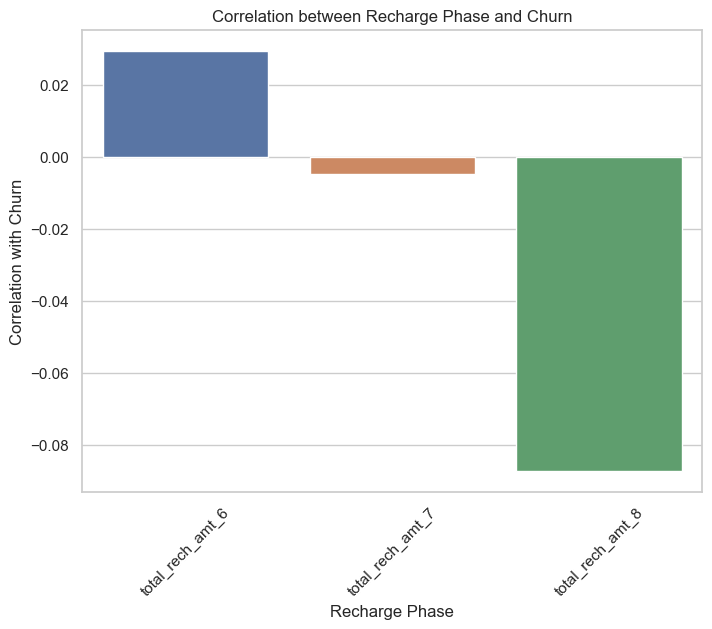

In [71]:
# Bivariate analysis: Correlation between recharge amount and churn
# total_rech_amt_cols
churn_corr = high_value_customers[total_rech_amt_cols + ['churn']].corr()['churn'].drop('churn')


# Plot a graph to visualize the correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_corr.index, y=churn_corr.values)
plt.xlabel('Recharge Phase')
plt.ylabel('Correlation with Churn')
plt.title('Correlation between Recharge Phase and Churn')
plt.xticks(rotation=45)
plt.show()

Inference- 

- The recharge amount in the Action phase has a negative correlation causing the customers to churn.

<h1 style="color:green;"> 3. Segmentation Analysis

<h3 style="color:blue;">1. Recharge Behavior

In [72]:
# Segmenting customers based on recharge behavior for Good phase (total_rech_amt_6 and total_rech_amt_7)
high_value_customers['good_phase_recharge_segment'] = pd.cut(high_value_customers['total_rech_amt_6'] + high_value_customers['total_rech_amt_7'], 
                                                            bins=3, labels=['low', 'medium', 'high'])

# Segmenting customers based on recharge behavior for Action phase (total_rech_amt_8)
high_value_customers['action_phase_recharge_segment'] = pd.cut(high_value_customers['total_rech_amt_8'], 
                                                               bins=3, labels=['low', 'medium', 'high'])

# Calculate churn rates for each recharge segment
good_phase_recharge_churn = high_value_customers.groupby('good_phase_recharge_segment')['churn'].mean()
action_phase_recharge_churn = high_value_customers.groupby('action_phase_recharge_segment')['churn'].mean()

# Print churn rates for each segment
print("Churn rates for Good phase recharge segments:")
print(good_phase_recharge_churn)
print("\nChurn rates for Action phase recharge segments:")
print(action_phase_recharge_churn)

Churn rates for Good phase recharge segments:
good_phase_recharge_segment
low       0.033231
medium    0.000000
high      0.000000
Name: churn, dtype: float64

Churn rates for Action phase recharge segments:
action_phase_recharge_segment
low       0.03323
medium    0.00000
high      0.00000
Name: churn, dtype: float64


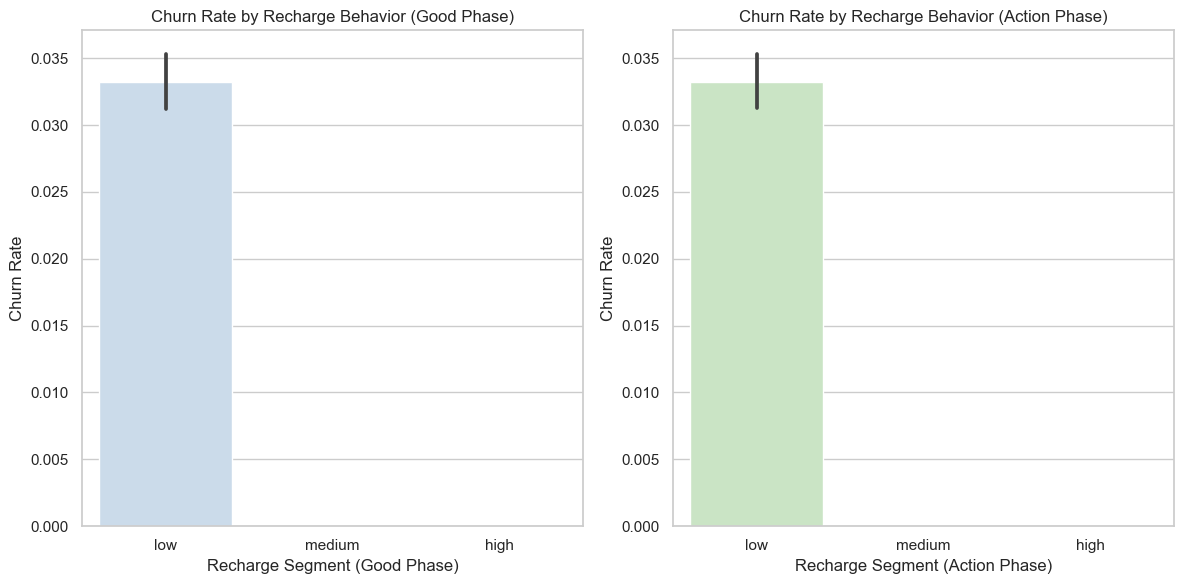

In [73]:
# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graph for segmented analysis: Good phase Recharge Behavior and Churn
sns.barplot(x='good_phase_recharge_segment', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Blues', ax=axes[0])
axes[0].set_xlabel('Recharge Segment (Good Phase)')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by Recharge Behavior (Good Phase)')

# Graph for segmented analysis: Action phase Recharge Behavior and Churn
sns.barplot(x='action_phase_recharge_segment', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Greens', ax=axes[1])
axes[1].set_xlabel('Recharge Segment (Action Phase)')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Recharge Behavior (Action Phase)')

plt.tight_layout()
plt.show()

**Inference -** 

-  Recharge behavior likely refers to how often a customer adds money to their account.

- The good phase and in the action phase, there is less of a difference in churn rate between the different recharge segments.

<h3 style="color:blue;"> 2. Roaming Behavior

In [74]:
# Segmented analysis: Segment customers based on roaming behavior and analyze churn rates
high_value_customers['roaming_segment_good_phase'] = pd.cut(high_value_customers['roam_og_mou_6'] + high_value_customers['roam_ic_mou_6'] + 
                                                 high_value_customers['roam_og_mou_7'] + high_value_customers['roam_ic_mou_7'] , 
                                                 bins=3, labels=['low', 'medium', 'high'])
roaming_churn = high_value_customers.groupby('roaming_segment_good_phase')['churn'].mean()
print(roaming_churn)

roaming_segment_good_phase
low       0.032462
medium    0.220930
high      0.625000
Name: churn, dtype: float64


In [75]:
# Segmented analysis: Segment customers based on roaming behavior and analyze churn rates
high_value_customers['roaming_segment_action_phase'] = pd.cut(high_value_customers['roam_og_mou_8'] + high_value_customers['roam_ic_mou_8'], bins=3, labels=['low', 'medium', 'high'])
roaming_churn_action = high_value_customers.groupby('roaming_segment_action_phase')['churn'].mean()
print(roaming_churn_action)

roaming_segment_action_phase
low       0.032992
medium    0.119048
high      0.500000
Name: churn, dtype: float64


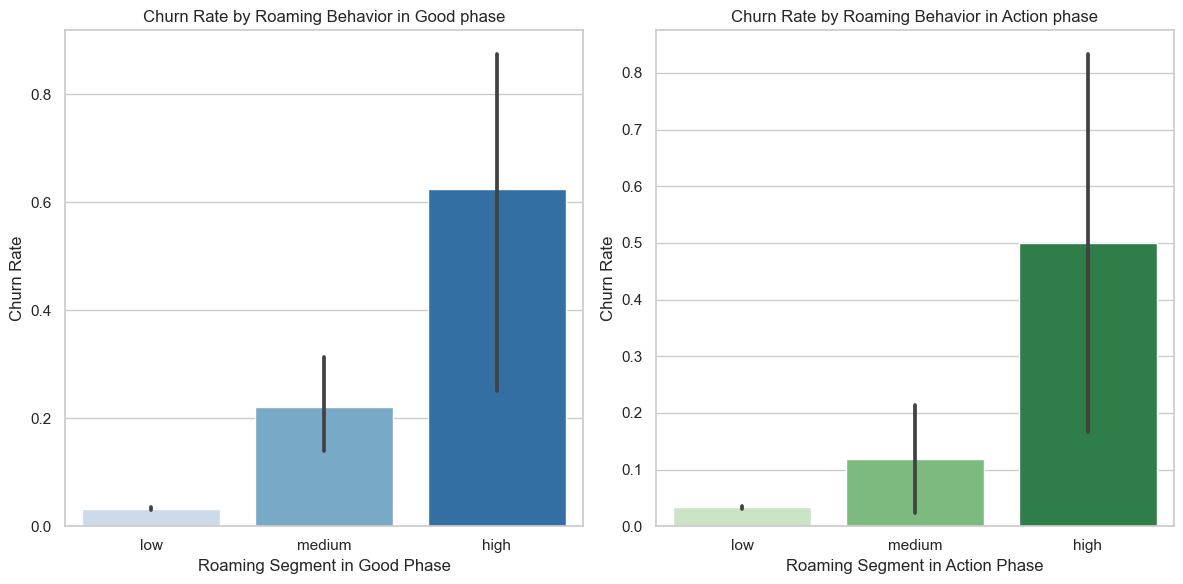

In [76]:
# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graph for segmented analysis: Roaming Behavior and Churn in Good phase
sns.barplot(x='roaming_segment_good_phase', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Blues', ax=axes[0])
axes[0].set_xlabel('Roaming Segment in Good Phase')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by Roaming Behavior in Good phase')

# Graph for segmented analysis: Roaming Behavior and Churn in Action phase
sns.barplot(x='roaming_segment_action_phase', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Greens', ax=axes[1])
axes[1].set_xlabel('Roaming Segment in Action Phase')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Roaming Behavior in Action phase')

plt.tight_layout()
plt.show()

Inference - 

- In both the good and action phases, churn rate is highest for customers in the high roaming segment. This suggests that customers who roam a lot are more likely to churn than customers who roam less.
- Churn rate appears to be lower overall in the good phase than in the action phase. This suggests that customers are more likely to churn during the action phase.
- Overall, this graph suggests that roaming behavior is a factor in customer churn, and that customers who roam a lot are more likely to churn. It also suggests that churn rate is higher during the action phase than in the good phase.

<h3 style="color:blue;"> 3. Network Usage

In [77]:
# Segmented analysis: Segment customers based on network usage and analyze churn rates
high_value_customers['usage_segment_in_good_phase'] = pd.cut(high_value_customers['total_og_mou_6'] + high_value_customers['total_ic_mou_6'] + 
                                                             high_value_customers['total_og_mou_7'] + high_value_customers['total_ic_mou_7'], 
                                                             bins=3, labels=['low', 'medium', 'high'])
usage_churn = high_value_customers.groupby('usage_segment_in_good_phase')['churn'].mean()
print(usage_churn)

usage_segment_in_good_phase
low       0.032927
medium    0.045952
high      0.130435
Name: churn, dtype: float64


In [78]:
# Segmented analysis: Segment customers based on network usage and analyze churn rates
high_value_customers['usage_segment_in_action_phase'] = pd.cut(high_value_customers['total_og_mou_8'] + high_value_customers['total_ic_mou_8'], bins=3, labels=['low', 'medium', 'high'])
usage_churn_action = high_value_customers.groupby('usage_segment_in_action_phase')['churn'].mean()
print(usage_churn_action)

usage_segment_in_action_phase
low       0.033305
medium    0.016529
high      0.000000
Name: churn, dtype: float64


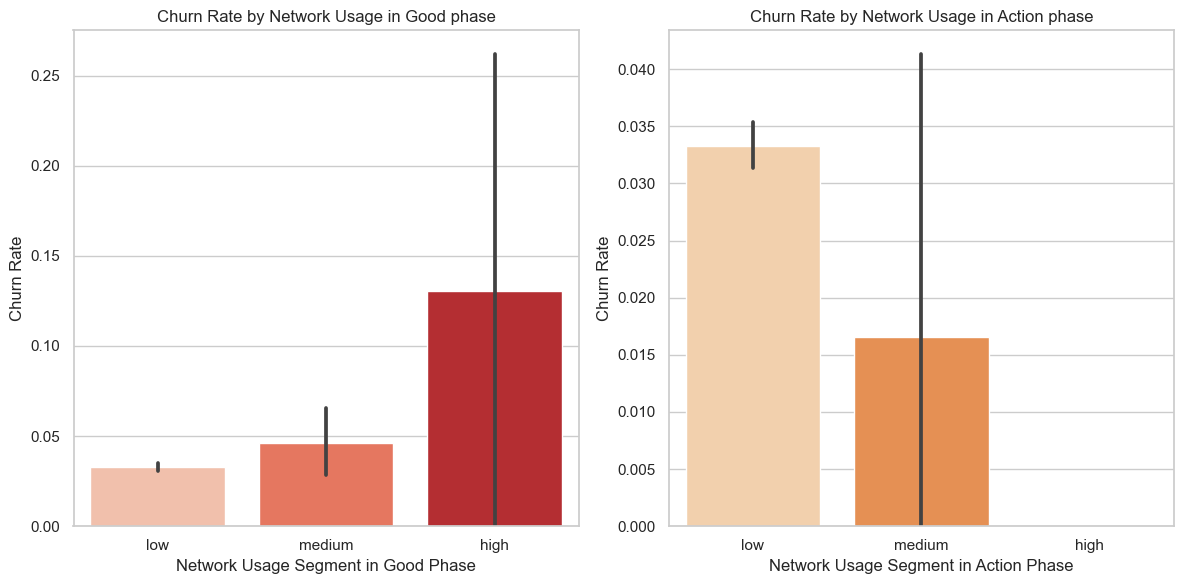

In [79]:
# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graph for segmented analysis: Network Usage and Churn in Good phase
sns.barplot(x='usage_segment_in_good_phase', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Reds', ax=axes[0])
axes[0].set_xlabel('Network Usage Segment in Good Phase')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by Network Usage in Good phase')

# Graph for segmented analysis: Network Usage and Churn in Action phase
sns.barplot(x='usage_segment_in_action_phase', y='churn', data=high_value_customers, order=['low', 'medium', 'high'], palette='Oranges', ax=axes[1])
axes[1].set_xlabel('Network Usage Segment in Action Phase')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Network Usage in Action phase')

plt.tight_layout()
plt.show()

Inference - 

- The chart for the good phase shows a higher churn rate for all levels of network usage compared to the action phase.  For example, in the good phase, the churn rate for low network usage is about 0.02 , whereas in the action phase it’s about 0.01.
- The higher churn rate in the action phase and it could be because customers who are not satisfied with the service are more likely to cancel during this period.

- The good phase could represent a period of time when a customer is using less than their allotted network usage. In this case, the higher churn rate in the good phase could be because these customers are looking for a cheaper plan or a plan that better meets their needs.

<h1 style="color:green;">4. Multivariate Analysis

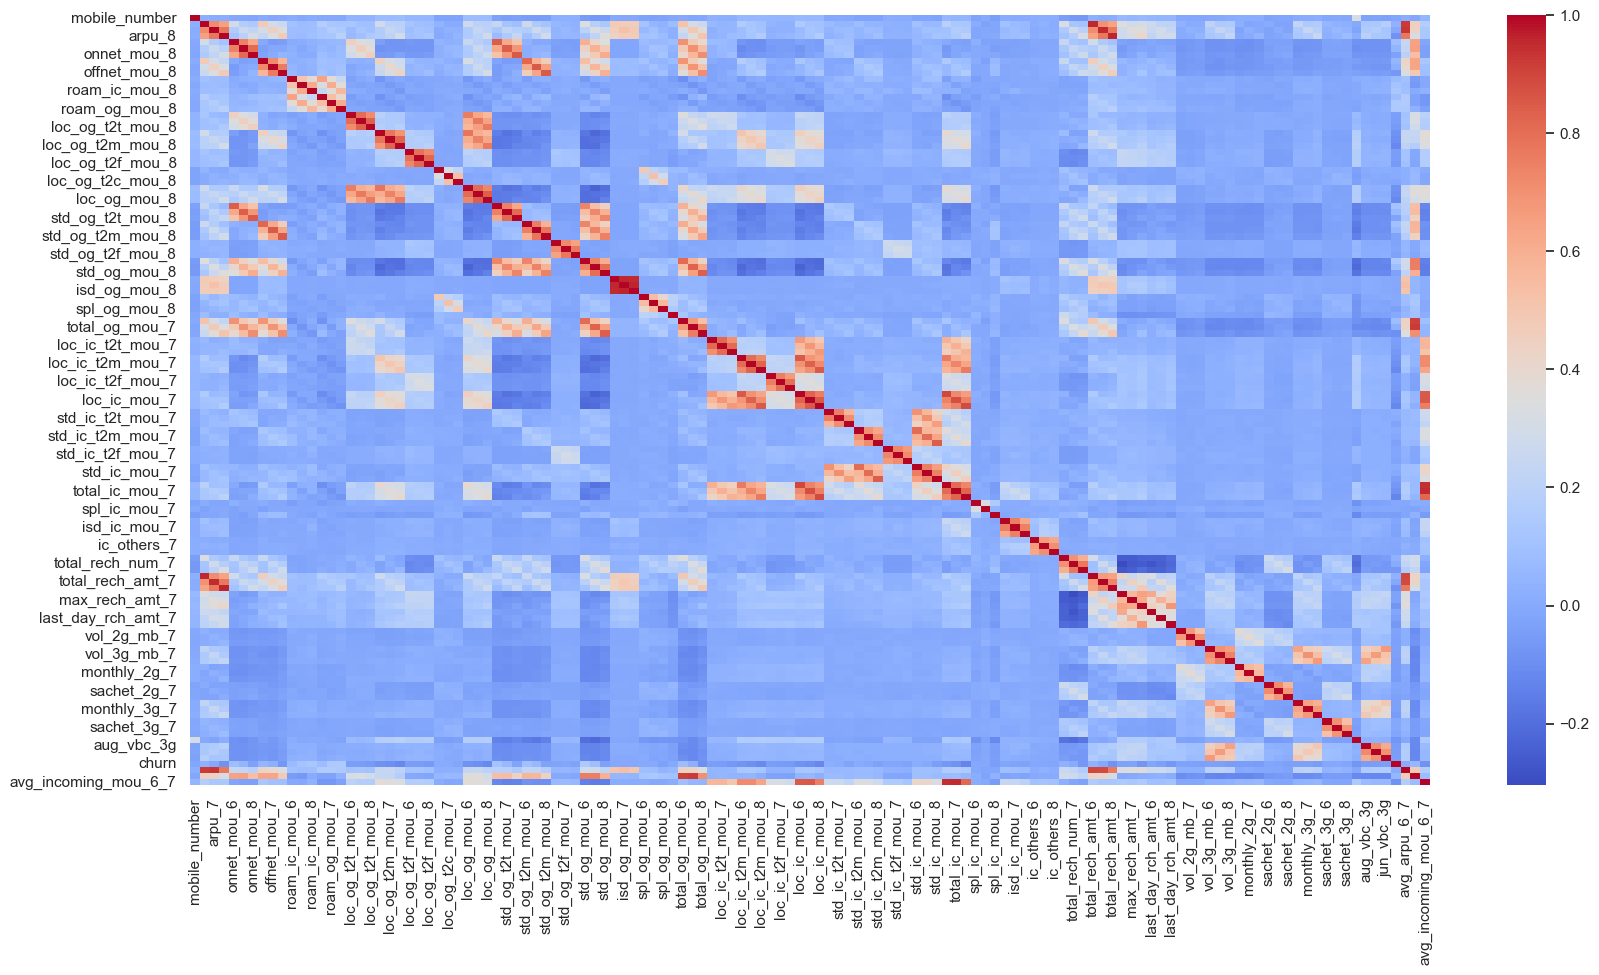

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(high_value_customers.corr(), cmap='coolwarm')
plt.show()

<h3 style="color:blue;"> Roaming Usage and Churn:

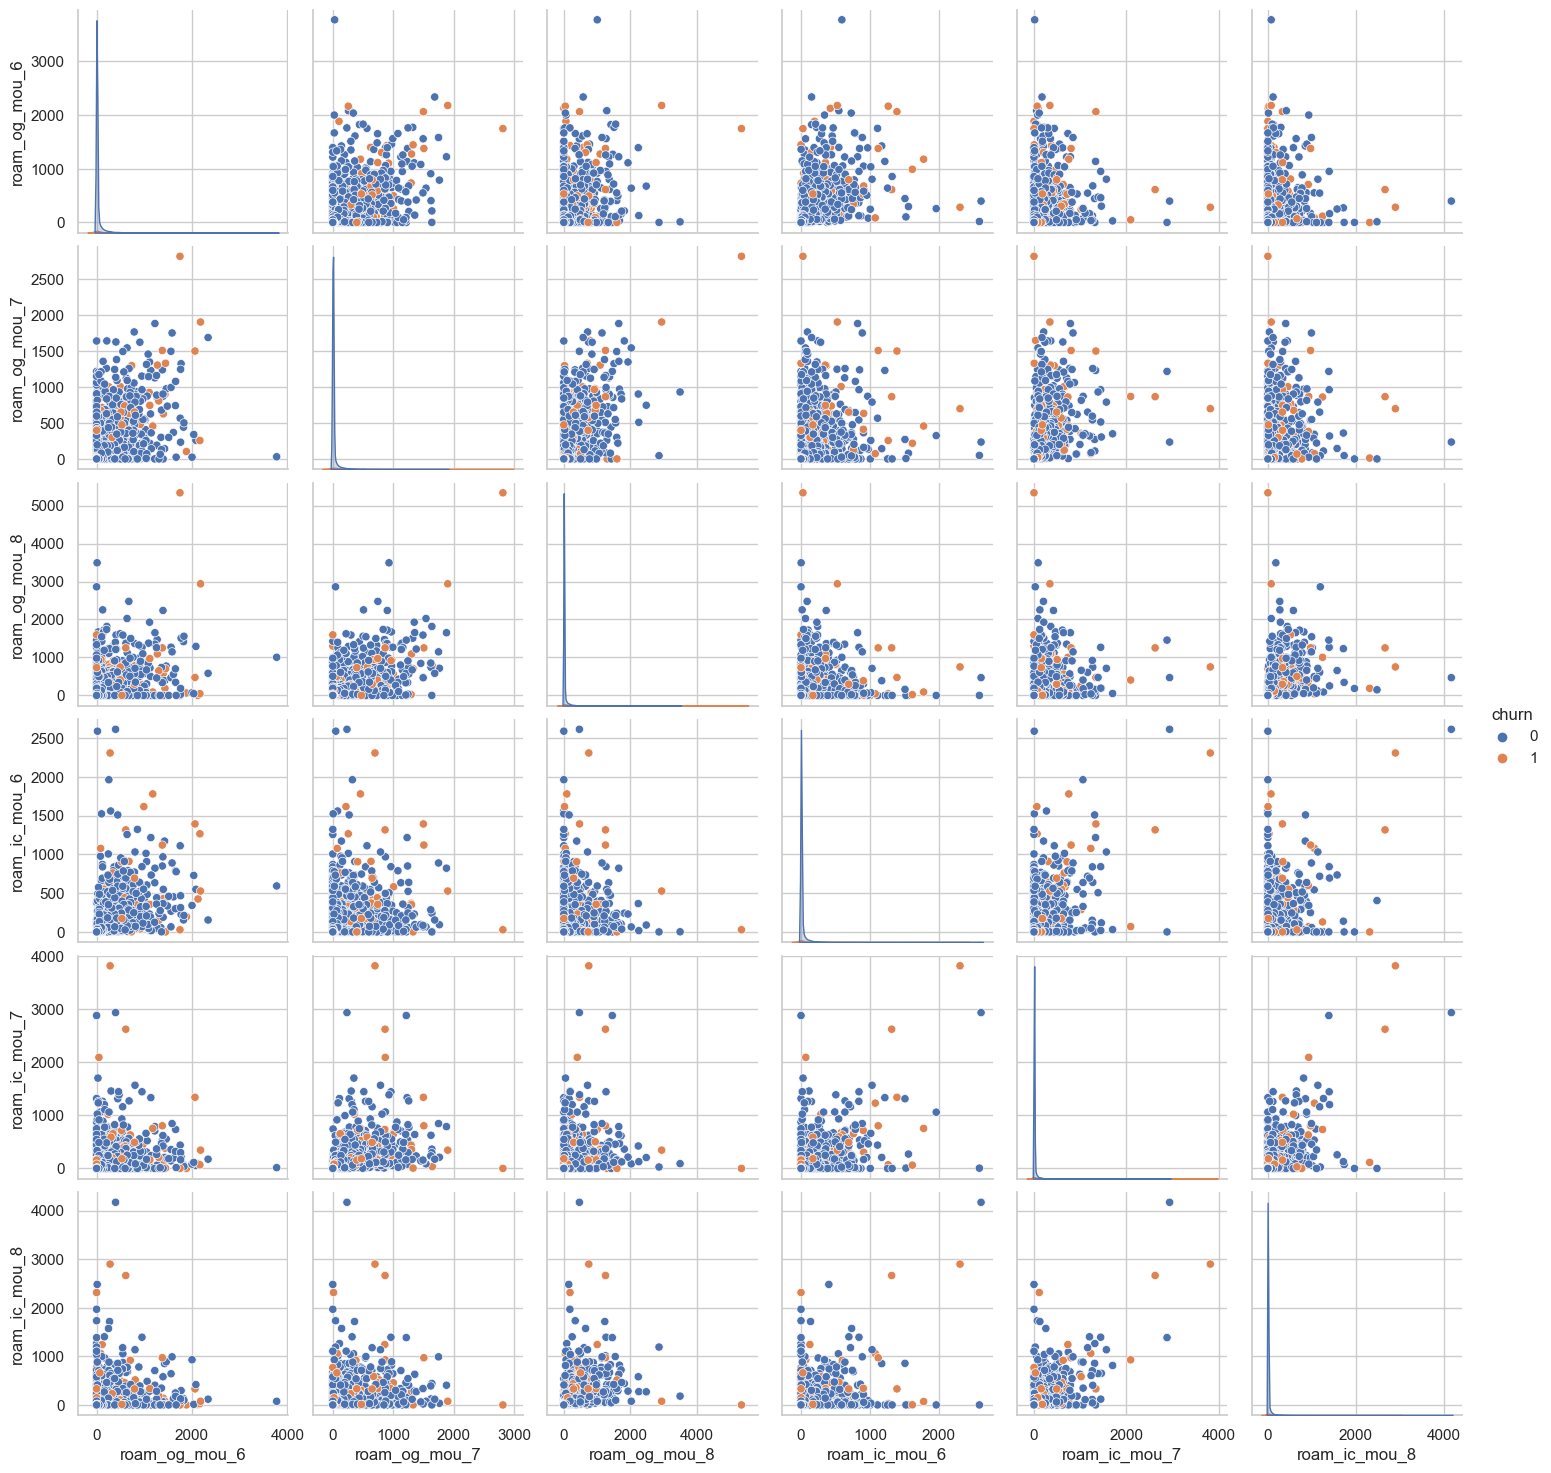

In [81]:
# Relationship between roaming usage and churn
roaming_cols = ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
                'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']
sns.pairplot(data=high_value_customers, vars=roaming_cols, hue='churn')
plt.show()

#### Dropping the derived columns, which are not required in further analysis

In [82]:
high_value_customers = high_value_customers.drop(['avg_arpu_6_7', 'avg_outgoing_mou_6_7', 'avg_incoming_mou_6_7', 
                                      'good_phase_recharge_segment','action_phase_recharge_segment',
                                     'roaming_segment_good_phase','roaming_segment_action_phase',
                                     'usage_segment_in_good_phase', 'usage_segment_in_action_phase'], axis = 1)

In [83]:
high_value_customers.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 124 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

<h1 style="color:darkviolet"> OUTLIERS TREATMENT</h1>

In the filtered dataset, all columns except for `mobile_number` and `churn` are required to have numeric data types. Therefore, the mobile_number and churn columns need to be converted to object data types.

In [84]:
# Convert specific columns to object data type
columns_to_convert = ['mobile_number', 'churn']
high_value_customers[columns_to_convert] = high_value_customers[columns_to_convert].astype('object')

In [85]:
high_value_customers.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Data columns (total 124 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [86]:
# List only the numeric columns
num_cols = high_value_customers.select_dtypes(exclude=['object']).columns
print(num_cols)
print('There are',len(num_cols), 'numeric columns')

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=122)
There are 122 numeric columns


#### Treatment of Outliers

In [87]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = high_value_customers[col].quantile(0.10)
    q3 = high_value_customers[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    telecom_capped  = high_value_customers.loc[(high_value_customers[col] > range_low) & (high_value_customers[col] < range_high)]

telecom_capped.shape

(26495, 124)

In [88]:
telecom_capped.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  26495.000000  26495.000000  26495.000000  26495.000000  26495.000000   
mean     572.572374    587.839850    551.678498    299.706733    315.030076   
std      417.950570    444.085415    481.925602    456.959912    485.861233   
min     -810.661000   -622.509000   -345.129000      0.000000      0.000000   
25%      362.832000    371.002500    317.048000     45.180000     46.585000   
50%      487.279000    495.459000    466.967000    131.960000    134.590000   
75%      682.391000    695.654000    679.226500    360.160000    377.285000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  26495.000000  26495.000000  26495.000000  26495.000000   26495.000000   
mean     287.251215    419.792892    435.009447    397.968223      17.199067   
std      478.131435    460.341622    484.493032    481.961887      76.505667   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       36.650000    144.970000    148.795000    117.250000       0.000000   
50%      113.990000    288.290000    294.030000    262.180000       0.000000   
75%      329.260000    524.210000    544.840000    505.550000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       ...  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6  \
count  ...  26495.000000  26495.000000  26495.000000  26495.000000   
mean   ...      0.126477      0.148632      0.145952      0.131044   
std    ...      0.445792      0.538987      0.514404      0.844992   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...     11.000000     16.000000     16.000000     29.000000   

        sachet_3g_7   sachet_3g_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  26495.000000  26495.000000  26495.000000  26495.000000  26495.000000   
mean       0.143989      0.142593   1290.384941    100.425276     95.350340   
std        0.921540      0.973982    978.734745    294.654680    286.489699   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    487.000000      0.000000      0.000000   
50%        0.000000      0.000000    949.000000      0.000000      0.000000   
75%        0.000000      0.000000   1978.000000      0.000000      0.000000   
max       33.000000     41.000000   4321.000000   6686.880000   5822.260000   

         jun_vbc_3g  
count  26495.000000  
mean      65.258284  
std      174.166108  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      995.930000  

[8 rows x 122 columns]

Now there are no outliers.

In [89]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_capped.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

isd_og_mou_8      isd_og_mou_7        0.964834
isd_og_mou_7      isd_og_mou_6        0.960226
total_rech_amt_8  arpu_8              0.960198
isd_og_mou_8      isd_og_mou_6        0.955976
total_rech_amt_6  arpu_6              0.953318
total_rech_amt_7  arpu_7              0.949522
total_ic_mou_6    loc_ic_mou_6        0.897420
total_ic_mou_8    loc_ic_mou_8        0.887789
total_ic_mou_7    loc_ic_mou_7        0.882361
std_og_t2t_mou_8  onnet_mou_8         0.854666
std_og_t2m_mou_7  offnet_mou_7        0.851757
std_og_t2m_mou_8  offnet_mou_8        0.851490
std_og_t2t_mou_6  onnet_mou_6         0.850650
loc_ic_mou_8      loc_ic_t2m_mou_8    0.848553
                  loc_ic_mou_7        0.848168
std_og_t2t_mou_7  onnet_mou_7         0.847502
std_ic_mou_8      std_ic_t2m_mou_8    0.845831
loc_ic_mou_6      loc_ic_t2m_mou_6    0.845594
total_og_mou_8    std_og_mou_8        0.841640
loc_og_mou_8      loc_og_mou_7        0.838177
total_og_mou_7    std_og_mou_7        0.834261
loc_og_t2t_mo

In [90]:
columns_to_drop=['isd_og_mou_8', 'isd_og_mou_7', 'total_rech_amt_8', 'isd_og_mou_8', 'total_rech_amt_6', 'total_rech_amt_7',
                'total_ic_mou_6', 'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_8','std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                 'std_og_t2t_mou_6']

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_capped.drop(columns_to_drop, axis=1, inplace=True)

In [91]:
# Converting 'churn' back to integer 
telecom_capped['churn'] = telecom_capped['churn'].astype(int)

In [92]:
telecom_capped.shape

(26495, 112)

The final dataset contains - 
-  26495 rows
-  112 columns

<h1 style="color:darkviolet"> MODELING

In [93]:
# Split data into features and target
X = telecom_capped.drop(columns=['churn', 'mobile_number'], axis=1)
y = telecom_capped['churn']

In [94]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of y_train:", y_train.shape)

Dimension of X_train: (21196, 110)
Dimension of y_train: (21196,)


<h1 style="color:darkviolet"> FEATURE SCALING

In [96]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [97]:
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

# Convert the scaled array back to a DataFrame (optional)
#X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now X_train_resampled contains the scaled values of all columns in X_train

In [98]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
58963  0.039564  0.026498  0.018059     0.008569     0.009761     0.006651   
38559  0.037152  0.034137  0.030759     0.007419     0.024912     0.018180   
14693  0.087363  0.045440  0.027859     0.036867     0.055699     0.016557   
12248  0.042587  0.031375  0.017930     0.006169     0.003793     0.002194   
21844  0.083043  0.058625  0.067706     0.165187     0.275460     0.229293   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
58963      0.031557      0.023860      0.016820       0.000000  ...   
38559      0.028922      0.102213      0.075791       0.002721  ...   
14693      0.181616      0.103087      0.064154       0.000000  ...   
12248      0.082257      0.104321      0.035870       0.012134  ...   
21844      0.226483      0.074341      0.057594       0.022676  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
58963      0.000000           0.0           0.0          0.0          0.0   
38559      0.000000           0.0           0.0          0.0          0.0   
14693      0.090909           0.0           0.0          0.0          0.0   
12248      0.000000           0.0           0.0          0.0          0.0   
21844      0.000000           0.0           0.0          0.0          0.0   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
58963          0.0  0.182082         0.0         0.0         0.0  
38559          0.0  0.103115         0.0         0.0         0.0  
14693          0.0  0.115190         0.0         0.0         0.0  
12248          0.0  0.255494         0.0         0.0         0.0  
21844          0.0  0.010142         0.0         0.0         0.0  

[5 rows x 110 columns]

<h1 style="color:darkviolet"> Handling class imbalance using SMOTE

In [99]:
# Converting y_train to int
# 'y_train' is a pandas Series of training data
y_train = y_train.astype(int)

# Check the data type and unique values of 'y_train'
print("Data type of y_train:", type(y_train))
print("Unique values in y_train:", np.unique(y_train))

Data type of y_train: <class 'pandas.core.series.Series'>
Unique values in y_train: [0 1]


In [100]:
# Oversample the minority class (churn) to address imbalance

sm  = SMOTE(random_state=42)
print('Values before oversampling:\n', y_train.value_counts())

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

X_train_sm=pd.DataFrame(X_train_sm, columns= X_train.columns)
print('Values after oversampling:\n', pd.DataFrame(y_train_sm).value_counts())

Values before oversampling:
 0    20471
1      725
Name: churn, dtype: int64
Values after oversampling:
 churn
0        20471
1        20471
dtype: int64


### Looking at Correlations

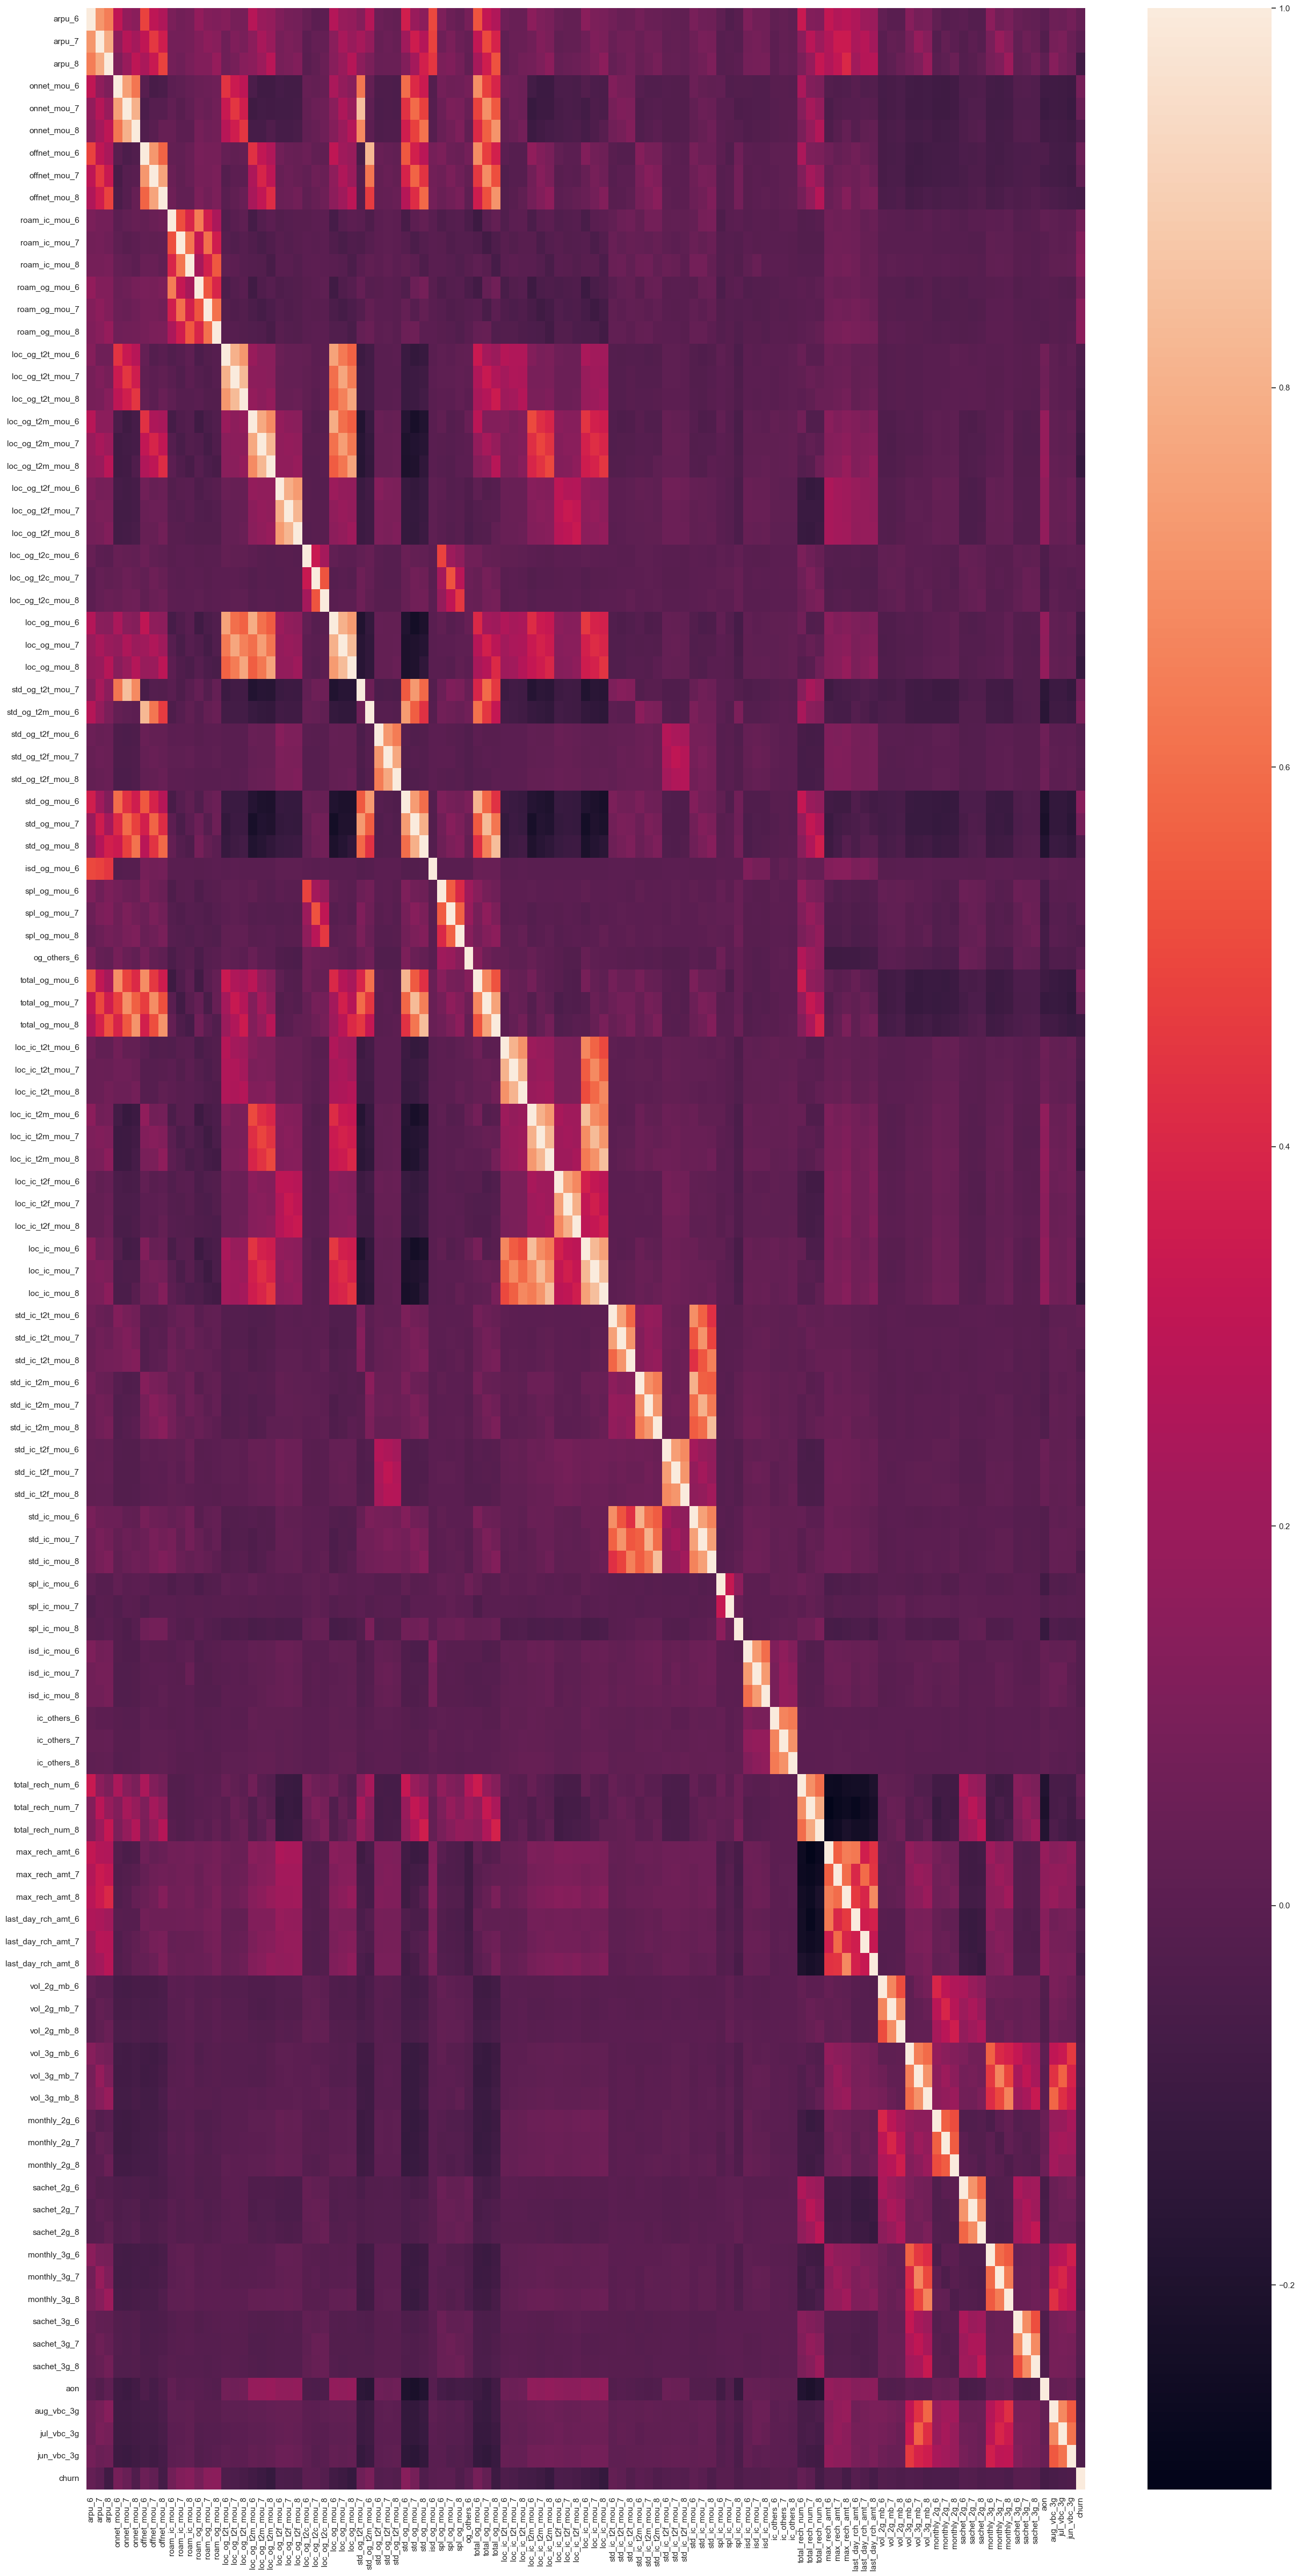

In [101]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,60))        # Size of the figure
sns.heatmap(telecom_capped.corr())
plt.show()

<h1 style="color:darkviolet"> MODEL BUILDING

<h2 style="color:green"> Feature Importance Model - RANDOM FOREST CLASSIFIER

### PREDICTIVE MODEL

In [102]:
# Build predictive model (Random Forest classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
rf_predictions = rf_model.predict(X_test)

In [103]:
# Use feature importances from Random Forest to identify important features
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=["importance"])
important_features = feature_importances.sort_values(by="importance", ascending=False)


In [104]:
# Display top 10 important features
print("\nTop 10 Important Features (Random Forest):")
print(important_features.head(10))


Top 10 Important Features (Random Forest):
                    importance
roam_ic_mou_8         0.192048
roam_og_mou_8         0.187032
loc_ic_t2m_mou_8      0.045409
loc_ic_mou_8          0.035296
loc_og_mou_8          0.034616
roam_og_mou_7         0.029884
loc_og_t2m_mou_8      0.028581
roam_ic_mou_7         0.027209
last_day_rch_amt_8    0.021328
loc_ic_t2f_mou_8      0.018494


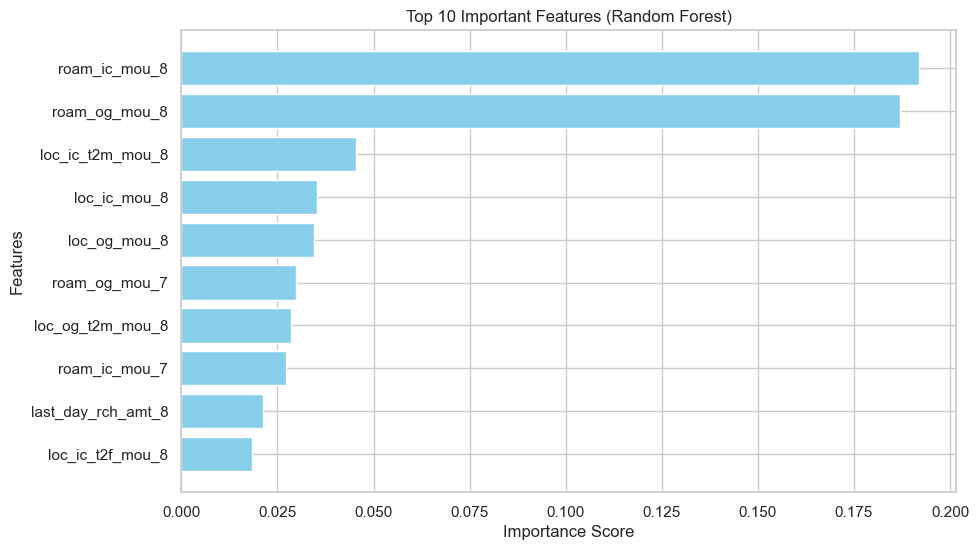

In [105]:
# 4. Visualization and Interpretation
# Visualize feature importance from the logistic regression model
# Create a bar chart
top10features = important_features.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10features.index, top10features['importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

The calls in the roaming zone in August (Action Phase) have the highest importance followed by local calls.

Let's Build the model using Logistic Regression.

<h2 style="color:blue;">  Building 1st Logistic Regression model

In [106]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [107]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40942
Model:                            GLM   Df Residuals:                    40831
Model Family:                Binomial   Df Model:                          110
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13564.
Date:                Sun, 07 Apr 2024   Deviance:                       27128.
Time:                        01:40:31   Pearson chi2:                 2.62e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5150
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3162      0.124     10.610      0.000       1.073       1.559
arpu_6                13.3557      4.341      3.077      0.002       4.847      21.864
arpu_7                 6.5629      5.574      1.177      0.239      -4.362      17.487
arpu_8                 0.0730      4.809      0.015      0.988      -9.352       9.498
onnet_mou_6           22.1165     45.677      0.484      0.628     -67.410     111.643
onnet_mou_7          118.2819     30.000      3.943      0.000      59.483     177.080
onnet_mou_8         -132.0698     47.910     -2.757      0.006    -225.972     -38.168
offnet_mou_6          32.2445     51.745      0.623      0.533     -69.174     133.663
offnet_mou_7         154.2353     35.100      4.394      0.000      85.441     223.029
offnet_mou_8        -173.7802     62.428     -2.784      0.005    -296.137     -51.423
roam_ic_mou_6          4.9222      0.847      5.809      0.000       3.261       6.583
roam_ic_mou_7          4.1749      1.850      2.257      0.024       0.549       7.801
roam_ic_mou_8          8.4009      1.750      4.800      0.000       4.971      11.831
roam_og_mou_6        -15.6554     23.385     -0.669      0.503     -61.489      30.178
roam_og_mou_7        -44.1145     10.241     -4.308      0.000     -64.187     -24.042
roam_og_mou_8         88.7362     23.775      3.732      0.000      42.137     135.335
loc_og_t2t_mou_6   -1.844e+04   2.09e+04     -0.883      0.377   -5.93e+04    2.25e+04
loc_og_t2t_mou_7   -5318.0186   2.32e+04     -0.229      0.819   -5.08e+04    4.01e+04
loc_og_t2t_mou_8    2.824e+05   3.56e+04      7.930      0.000    2.13e+05    3.52e+05
loc_og_t2m_mou_6   -1.357e+04   1.54e+04     -0.884      0.377   -4.37e+04    1.65e+04
loc_og_t2m_mou_7   -3226.1214    1.4e+04     -0.231      0.817   -3.06e+04    2.42e+04
loc_og_t2m_mou_8    9.316e+04   1.17e+04      7.931      0.000    7.01e+04    1.16e+05
loc_og_t2f_mou_6   -1944.6411   2195.692     -0.886      0.376   -6248.118    2358.836
loc_og_t2f_mou_7    -761.4556   3316.392     -0.230      0.818   -7261.465    5738.554
loc_og_t2f_mou_8    2.437e+04   3075.437      7.926      0.000    1.83e+04    3.04e+04
loc_og_t2c_mou_6       2.8459      0.867      3.282      0.001       1.146       4.545
loc_og_t2c_mou_7     -10.3369      2.328     -4.440      0.000     -14.900      -5.773
loc_og_t2c_mou_8       4.9416      1.621      3.049      0.002       1.765       8.118
loc_og_mou_6       -7.542e+04   4.14e+04     -1.821      0.069   -1.57e+05    5762.391
loc_og_mou_7        5524.9524   2.41e+04      0.230      0.818   -4.16e+04    5.27e+04
loc_og_mou_8       -2.896e+05   3.66e+04     -7.922      0.000   -3.61e+05   -2.18e+05
std_og_t2t_mou_7       8.9815      5.338      1.683      0.092      -1.480      19.443
std_og_t2m_mou_6      -8.6901      4.1

### Feature Selection Using RFE

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 1000, random_state= 42)

In [109]:
# Specify the number of features to select
num_features_to_select = 20

# Create the RFE model and select 'num_features_to_select' features
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit the RFE model to the data
rfe.fit(X_train_sm, y_train_sm)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=20)

In [110]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [111]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 53),
 ('arpu_7', False, 50),
 ('arpu_8', False, 61),
 ('onnet_mou_6', False, 51),
 ('onnet_mou_7', False, 32),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', False, 76),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 12),
 ('roam_ic_mou_7', False, 22),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 89),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 84),
 ('loc_og_t2t_mou_7', False, 48),
 ('loc_og_t2t_mou_8', False, 30),
 ('loc_og_t2m_mou_6', False, 10),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 36),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_6', False, 88),
 ('loc_og_t2c_mou_7', False, 42),
 ('loc_og_t2c_mou_8', False, 85),
 ('loc_og_mou_6', False, 52),
 ('loc_og_mou_7', False, 49),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2t_mou_7', False, 83),
 ('std_og_t2m_mou_6', False, 66),
 ('std_og_t2f

In [112]:
col = X_train_sm.columns[rfe.support_]

In [113]:
X_train_sm.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6',
       'spl_og_mou_7', 'og_others_6', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2

#### Assessing the model with StatsModels

In [114]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                40942
Model:                            GLM   Df Residuals:                    40921
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14641.
Date:                Sun, 07 Apr 2024   Deviance:                       29281.
Time:                        18:40:34   Pearson chi2:                 5.59e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4889
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7410      0

All beta coefficients have p values less than `.05` . We can proceed with making predictions using this model only

<h1 style="color:darkviolet;"> VALUE PREDICTION & EVALUATION

In [115]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)

# Reshaping the predictions for the training set to ensure compatibility with other operations or data structures
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)

# Displaying the first 10 reshaped predicted values for the training set
y_train_sm_pred[:10]

array([0.48114701, 0.05218837, 0.00115952, 0.0068929 , 0.00136647,
       0.07443958, 0.56120063, 0.00638448, 0.10294262, 0.04982947])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [116]:
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Churn  Churn_prob
0      0    0.481147
1      0    0.052188
2      0    0.001160
3      0    0.006893
4      0    0.001366

#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [117]:
y_train_sm_pred_final['Churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Churn  Churn_prob  Churn_pred
0      0    0.481147           0
1      0    0.052188           0
2      0    0.001160           0
3      0    0.006893           0
4      0    0.001366           0

In [118]:
# Adding 'Customer ID' column to 'y_train_pred_final', containing the index values from the training set
y_train_sm_pred_final['CustID'] = y_train_sm.index

# Viewing the prediction results
y_train_sm_pred_final.head()

Churn  Churn_prob  Churn_pred  CustID
0      0    0.481147           0       0
1      0    0.052188           0       1
2      0    0.001160           0       2
3      0    0.006893           0       3
4      0    0.001366           0       4

### <i>Evaluating the Model

In [119]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_pred )
print(confusion)

[[17081  3390]
 [ 2595 17876]]


In [120]:
# Predicted     not_churn    churn
# Actual
# not_churn        17081      3390
# churn            2595       17876

In [121]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_pred))

The overall accuracy of the model is: 0.8538175956230766


#### Checking the VIF

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
12        loc_ic_mou_8  2.386989e+09
10    loc_ic_t2m_mou_8  1.130474e+09
9     loc_ic_t2t_mou_8  4.532349e+08
11    loc_ic_t2f_mou_8  3.295410e+07
4     loc_og_t2m_mou_8  5.820000e+00
3     loc_og_t2m_mou_7  4.830000e+00
8       total_og_mou_8  3.840000e+00
2        roam_og_mou_8  3.080000e+00
1        roam_og_mou_7  2.530000e+00
14    total_rech_num_8  2.520000e+00
6         std_og_mou_7  2.440000e+00
15  last_day_rch_amt_7  2.070000e+00
16  last_day_rch_amt_8  1.900000e+00
0        roam_ic_mou_8  1.540000e+00
18        monthly_2g_8  1.300000e+00
17         vol_2g_mb_8  1.260000e+00
5     loc_og_t2f_mou_6  1.240000e+00
7         spl_og_mou_8  1.180000e+00
13        std_ic_mou_8  1.150000e+00
19        monthly_3g_8  1.110000e+00

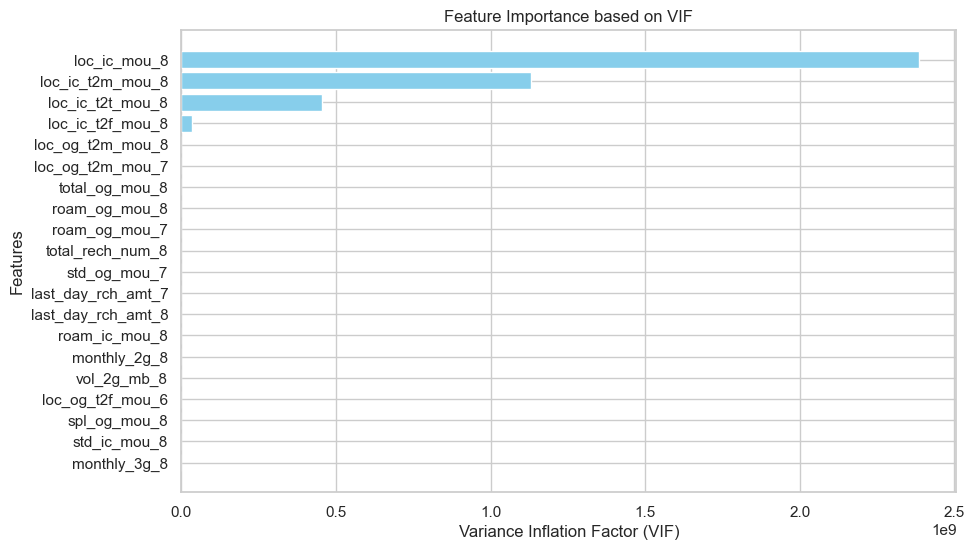

In [123]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(vif['Features'], vif['VIF'], color='skyblue', data=vif)
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Features')
plt.title('Feature Importance based on VIF')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### <i> Metrics beyond simply accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
print("The sensitivity is ",round(100 * (TP / float(TP+FN)),2))

The sensitivity is  87.32


In [126]:
# Let us calculate specificity
print("The specificity is ",round(100 * (TN / float(TN+FP)),2))

The specificity is  83.44


In [127]:
# Calculate false postive rate - predicting converted when customer has not converted
print("The false postive rate is ",round(100 * (FP/ float(TN+FP)),2))

The false postive rate is  16.56


In [128]:
# Positive predictive value 
print ("Positive predictive value is ", round(100 *(TP / float(TP+FP)),2))

Positive predictive value is  84.06


In [129]:
# Negative predictive value
print ("Negative predictive value is ", round(100 *(TN / float(TN+ FN)),2))

Negative predictive value is  86.81


<h1 style="color:darkviolet"> PLOTTING THE ROC CURVE

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob, drop_intermediate = False )

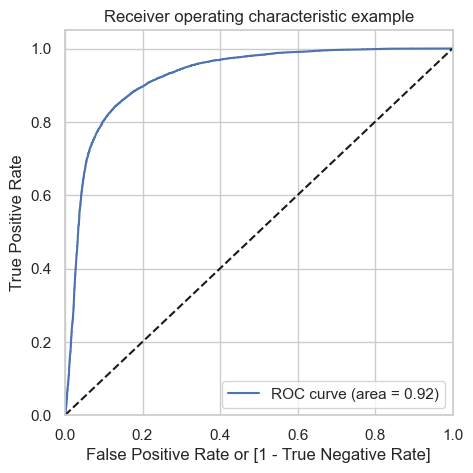

In [132]:
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob)

<h1 style="color:darkviolet;"> FINDING OPTIMAL CUTOFF POINT

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Churn  Churn_prob  Churn_pred  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.481147           0       0    1    1    1    1    1    0    0   
1      0    0.052188           0       1    1    0    0    0    0    0    0   
2      0    0.001160           0       2    1    0    0    0    0    0    0   
3      0    0.006893           0       3    1    0    0    0    0    0    0   
4      0    0.001366           0       4    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.740633  0.982268  0.498999
0.2   0.2  0.794587  0.965659  0.623516
0.3   0.3  0.824703  0.940941  0.708466
0.4   0.4  0.844219  0.910801  0.777637
0.5   0.5  0.853818  0.873235  0.834400
0.6   0.6  0.854966  0.827952  0.881979
0.7   0.7  0.842680  0.764789  0.920571
0.8   0.8  0.806629  0.663573  0.949685
0.9   0.9  0.662010  0.348640  0.975380


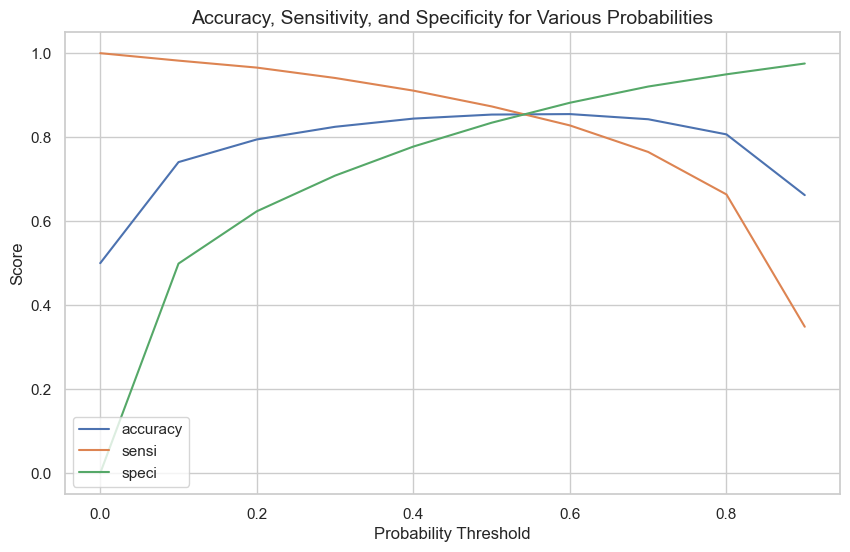

In [135]:
# Plot accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'],  figsize=(10, 6))
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity for Various Probabilities', fontsize=14)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

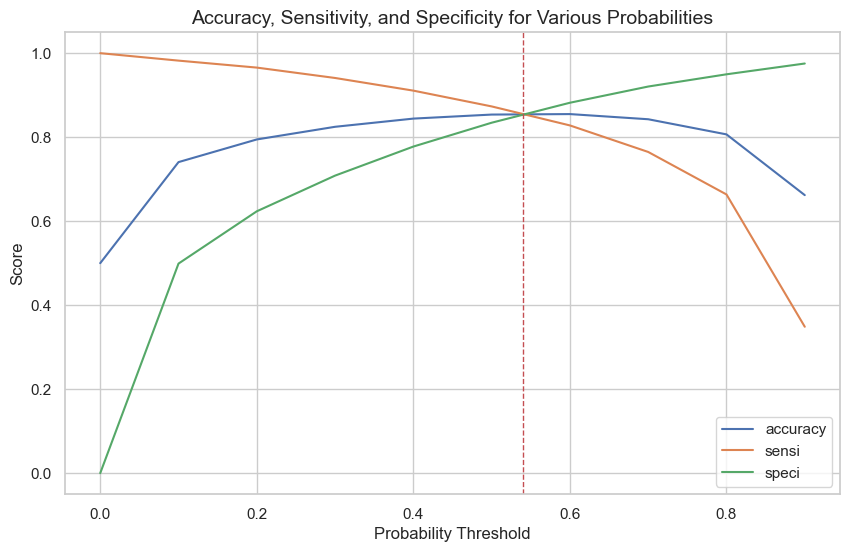

In [136]:
# Plot accuracy, sensitivity, and specificity for various probabilities with cut-off line
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], figsize=(10, 6))
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity for Various Probabilities', fontsize=14)
plt.grid(True)
plt.legend(loc='lower right')

# Plot the cut-off line at the threshold of 0.54
plt.axvline(x=0.54, color='r', linestyle='--', linewidth=1)

plt.show()

<h3 style="color:brown;"> From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [137]:
# Creating a new column 'final_predicted' in the DataFrame y_train_pred_final
# Using the map() function, a lambda function is applied to each value in the 'Converted_Prob' column
# If the value of 'Converted_Prob' is greater than 0.54, the corresponding value in 'final_predicted' is set to 1 
# Otherwise, it is set to 0

y_train_sm_pred_final['Final_predicted'] = y_train_sm_pred_final.Churn_prob.map( lambda x: 1 if x > 0.54 else 0) 


y_train_sm_pred_final.head()

Churn  Churn_prob  Churn_pred  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.481147           0       0    1    1    1    1    1    0    0   
1      0    0.052188           0       1    1    0    0    0    0    0    0   
2      0    0.001160           0       2    1    0    0    0    0    0    0   
3      0    0.006893           0       3    1    0    0    0    0    0    0   
4      0    0.001366           0       4    1    0    0    0    0    0    0   

   0.7  0.8  0.9  Final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [138]:
# Let's check the overall accuracy.
print('Overall Accuracy: ',round(100 * (metrics.accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Final_predicted)),2))

Overall Accuracy:  85.56


In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Final_predicted )
confusion

array([[17509,  2962],
       [ 2950, 17521]], dtype=int64)

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is ',round(100 *(TP / float(TP+FN)),2))

Sensitivity is  85.59


In [142]:
# Let us calculate specificity
print('Specificity is ', round( 100 * (TN / float(TN+FP)),2))

Specificity is  85.53


**Observation:**



So as we can see above the model seems to be performing well. The ROC curve has a value of 0.92, which is very good. We have the following values for the Train Data:

- Accuracy : 85.56%
- Sensitivity : 85.59%
- Specificity : 85.53% <br>



Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [143]:
# Calculate false postive rate - predicting converted when customer does not convert
print('False Postive Rate is ', round(100 * (FP/ float(TN+FP)),2))

False Postive Rate is  14.47


In [144]:
# Positive predictive value 
print ('Positive predictive value is ', round(100 * (TP / float(TP+FP)),2))

Positive predictive value is  85.54


In [145]:
# Negative predictive value
print ('Negative predictive value is ', round(100 * (TN / float(TN+ FN)),2))

Negative predictive value is  85.58


##### Precision & Recall

In [146]:
print('Precision is',round(100 * (precision_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Final_predicted)),2))

Precision is 85.54


In [147]:
print('Recall is',round(100 * (recall_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Final_predicted)),2))

Recall is 85.59


##### F1- score

In [148]:
# Calculating the F1-score
f1 = f1_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Final_predicted)

print("F1 Score:", round((100 * f1),2))

F1 Score: 85.56


<h3 style="color:brown;"> With the current cut off as 0.54, the accuracy is 85.56%, precision is 85.54% and recall is 85.59%

### Precision and recall tradeoff

In [149]:
y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_pred

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       1
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
 30       1
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       0
 49       0
 50       0
 51       1
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       0
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       0
 83 

In [150]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_prob)

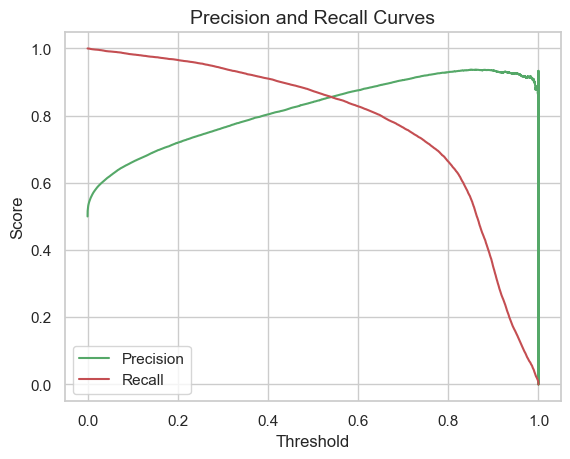

In [151]:
plt.plot(thresholds, p[:-1], "g-", label="Precision") 
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision and Recall Curves', fontsize=14)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

<h1 style="color:darkviolet;"> MAKING PREDICTIONS ON THE TEST SET

In [152]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
58666  0.041562  0.025142  0.016817     0.001445     0.004417     0.003840   
56889  0.090399  0.047215  0.051875     0.002540     0.022234     0.009680   
37276  0.049083  0.046647  0.023309     0.019757     0.019005     0.005774   
12842  0.042851  0.032754  0.028595     0.028300     0.029946     0.005569   
88327  0.042571  0.034727  0.023168     0.003729     0.008996     0.003930   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
58666      0.035318      0.020860      0.011843            0.0  ...   
56889      0.150272      0.061296      0.038146            0.0  ...   
37276      0.150913      0.126189      0.057078            0.0  ...   
12842      0.029865      0.030436      0.051215            0.0  ...   
88327      0.040749      0.045689      0.022468            0.0  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
58666           0.0        0.0000           0.0          0.0          0.0   
56889           0.0        0.0000           0.0          0.0          0.0   
37276           0.0        0.0625           0.0          0.0          0.0   
12842           0.0        0.0000           0.0          0.0          0.0   
88327           0.0        0.0000           0.0          0.0          0.0   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
58666          0.0  0.088143    0.000000    0.000000    0.000000  
56889          0.0  0.118570    0.195714    0.162131    0.715201  
37276          0.0  0.072929    0.000000    0.000000    0.000000  
12842          0.0  0.537310    0.000000    0.000000    0.000000  
88327          0.0  0.321903    0.000000    0.000000    0.000000  

[5 rows x 110 columns]

In [153]:
# Feature selection
X_test=X_test[col]
X_test.head()

roam_ic_mou_8  roam_og_mou_7  roam_og_mou_8  loc_og_t2m_mou_7  \
58666            0.0       0.000000            0.0          0.029075   
56889            0.0       0.053922            0.0          0.108135   
37276            0.0       0.000000            0.0          0.008264   
12842            0.0       0.000000            0.0          0.059481   
88327            0.0       0.000000            0.0          0.093640   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  std_og_mou_7  spl_og_mou_8  \
58666          0.023825          0.047954      0.003967      0.001595   
56889          0.148357          0.000000      0.002430      0.010309   
37276          0.015043          0.000000      0.116978      0.017148   
12842          0.200793          0.000828      0.001453      0.019789   
88327          0.077367          0.001478      0.003157      0.014660   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
58666        0.014843          0.004566          0.007631          0.000636   
56889        0.045461          0.004344          0.045167          0.003059   
37276        0.061967          0.005143          0.002595          0.000000   
12842        0.056454          0.001581          0.019124          0.003267   
88327        0.026222          0.015448          0.086213          0.000258   

       loc_ic_mou_8  std_ic_mou_8  total_rech_num_8  last_day_rch_amt_7  \
58666      0.010974      0.003560          0.007299            0.041935   
56889      0.048960      0.000178          0.029197            0.000000   
37276      0.006173      0.003102          0.043796            0.000000   
12842      0.021097      0.000342          0.065693            0.016129   
88327      0.096888      0.008459          0.182482            0.003226   

       last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  monthly_3g_8  
58666            0.029220          0.0           0.0           0.0  
56889            0.000000          0.0           0.0           0.0  
37276            0.011238          0.0           0.0           0.0  
12842            0.011238          0.0           0.0           0.0  
88327            0.022477          0.0           0.0           0.0

In [154]:
# Adding a constant column (intercept) to the test dataset using the statsmodels library
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [155]:
# Predicting the target variable (y) values using the fitted model 'res' and the test dataset with the constant added
y_test_pred = res.predict(X_test_sm)

# This generates predictions for the target variable based on the features in the test dataset

In [156]:
# Displaying the first 10 predicted values of the target variable from the test dataset
y_test_pred[:10]

58666    0.260481
56889    0.040304
37276    0.688614
12842    0.032085
88327    0.009999
84671    0.122478
60312    0.059704
20614    0.017701
81325    0.037475
56485    0.543156
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

0
58666  0.260481
56889  0.040304
37276  0.688614
12842  0.032085
88327  0.009999

In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
# Let's see the final head
y_pred_final.head()

churn  CustID         0
0      0   58666  0.260481
1      0   56889  0.040304
2      0   37276  0.688614
3      0   12842  0.032085
4      0   88327  0.009999

In [164]:
# Rename the '0' column to 'Churn_Prob'
y_pred_final.rename(columns={0: 'Churn_Prob'}, inplace=True)

# Re-arrange the columns
y_pred_final = y_pred_final[['CustID', 'churn', 'Churn_Prob']]

# Let's see the head of y_pred_final again
print(y_pred_final.head())

   CustID  churn  Churn_Prob
0   58666      0    0.260481
1   56889      0    0.040304
2   37276      0    0.688614
3   12842      0    0.032085
4   88327      0    0.009999


In [165]:
# Creating a new column 'final_predicted' in the DataFrame 'y_pred_final' based on the 'Converted_Prob' column
# If the value in 'Converted_Prob' is greater than 0.54, it is mapped to 1, otherwise to 0

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)

# This operation assigns a binary label (1 or 0) to each observation based on the probability threshold of 0.54

In [166]:
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0   58666      0    0.260481                0
1   56889      0    0.040304                0
2   37276      0    0.688614                1
3   12842      0    0.032085                0
4   88327      0    0.009999                0

In [167]:
# Let's check the overall accuracy.
print('The overall Accuracy is', round(100 * (metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)),2))

The overall Accuracy is 86.36


In [168]:
# Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[4421,  697],
       [  26,  155]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is ',round(100 * (TP / float(TP+FN)),2))

Sensitivity is  85.64


In [171]:
# Let us calculate specificity
print('Specificity is ',round(100 * (TN / float(TN+FP)),2))

Specificity is  86.38


<h3 style="color:brown;"> With the current cut off as 0.54, the accuracy is 86.36%, sensitivity is 85.64% and specificity is 86.38%

Overall, the model is performing well in the test set, what it had learnt from the train set.

<h1 style="color:green;">FINAL OBSERVATIONS AND CONCLUSIONS

Comparing the values obtained for TRAIN data and TEST data:

### TRAIN DATA:
> - <b>Accuracy:</b>  85.56% <br>
> - <b>Sensitivity:</b>  85.59%
> - <b>Specificity:</b> 85.53%

### TEST DATA:
> - <b>Accuracy:</b>  86.36% <br>
> - <b>Sensitivity:</b>  85.64%
> - <b>Specificity:</b> 86.38%


The Model seems to predict the Churn Rate very well.

The top variables in the model which contribute most towards the probability of finding a customer getting churned.

In [172]:
# Sorting the model parameters (coefficients) in descending order
res.params.sort_values(ascending=False)

loc_ic_t2m_mou_8      329421.082518
loc_ic_t2t_mou_8      229804.496104
loc_ic_t2f_mou_8       91156.072282
roam_og_mou_8             23.355516
roam_ic_mou_8             16.372581
std_og_mou_7              13.002660
roam_og_mou_7              2.191688
const                      1.740966
last_day_rch_amt_7        -5.572897
monthly_2g_8              -6.229082
loc_og_t2m_mou_8          -6.236766
total_rech_num_8          -6.509521
loc_og_t2m_mou_7          -6.541148
spl_og_mou_8              -8.374711
std_ic_mou_8              -9.651996
loc_og_t2f_mou_6         -10.626819
total_og_mou_8           -14.574545
monthly_3g_8             -16.878467
vol_2g_mb_8              -19.013351
last_day_rch_amt_8       -19.117903
loc_ic_mou_8         -330040.140395
dtype: float64

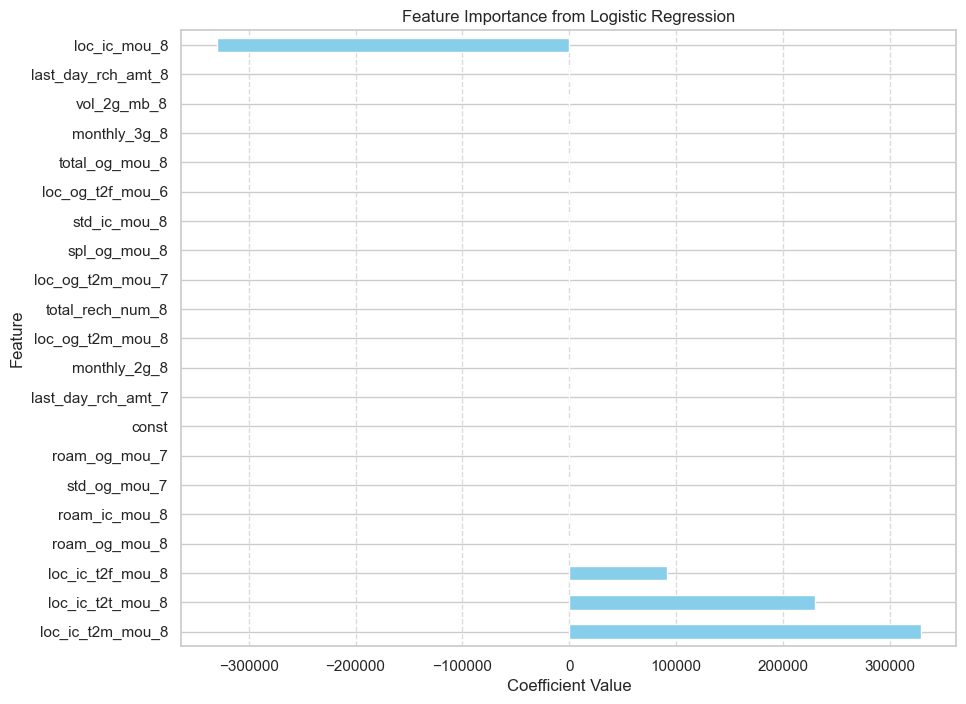

In [173]:
# Sort the model parameters (coefficients) in descending order
sorted_params = res.params.sort_values(ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sorted_params.plot(kind='barh', color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h1 style="color:darkviolet;"> BUSINESS RECOMMENDATIONS

Based on these predictors, here are some strategies to manage customer churn:

- **Improve Network Coverage:** Invest in improving network coverage and quality, especially for local and roaming calls, as these factors significantly influence churn.

- **Roaming Services Enhancement:** Enhance roaming services to provide a seamless experience for customers traveling outside their home network area.

- **Recharge Offers:** Design attractive recharge offers and schemes, focusing on the last day recharge amounts and the total number of recharges, to retain customers and incentivize usage.

- **Service Scheme Customization:** Offer personalized service schemes with validity equivalent to a month for both 2G and 3G networks, targeting specific customer segments based on usage patterns.

- **Data Usage Optimization:** Provide value-added services and data usage optimization tips to customers, considering factors like mobile internet usage volume for 2G network in August.

- **Customer Engagement:** Implement proactive customer engagement strategies, such as loyalty programs and personalized communication, to address customer needs and concerns effectively.